In [2]:
import pandas as pd
import re

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
from cycler import cycler
from matplotlib.ticker import FuncFormatter

In [6]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

In [7]:
pd.set_option('display.max_rows',60000)

In [8]:
pd.set_option('display.max_colwidth', 20)

In [9]:
df = pd.read_csv('Film_Permits.csv')

In [10]:
df.head()

,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,ZipCode(s)
0,300134,Shooting Permit,07/18/2016 06:00...,07/18/2016 12:00...,07/13/2016 10:28...,Mayor's Office o...,COLUMBUS AVENUE ...,Manhattan,7,20,Television,Morning Show,United States of...,10023
1,299797,Shooting Permit,07/18/2016 07:00...,07/18/2016 07:00...,07/11/2016 06:49...,Mayor's Office o...,22 STREET betwee...,Queens,2,108,Television,Cable-episodic,United States of...,11101
2,300179,Shooting Permit,07/18/2016 07:00...,07/18/2016 10:00...,07/13/2016 12:11...,Mayor's Office o...,MONITOR STREET b...,Queens,"1, 2","108, 94",Television,Episodic series,United States of...,"11101, 11222, 11378"
3,300630,Shooting Permit,07/18/2016 12:00...,07/18/2016 09:00...,07/14/2016 10:13...,Mayor's Office o...,ROCKAWAY BEACH B...,Queens,14,100,Commercial,Commercial,United States of...,11692
4,300127,Shooting Permit,07/18/2016 06:00...,07/18/2016 11:59...,07/13/2016 10:04...,Mayor's Office o...,10 AVENUE betwee...,Manhattan,4,10,Television,Reality,United States of...,10001


In [11]:
df['year'] = df['StartDateTime'].str.extract(r"(\d\d\d\d)")

In [12]:
df['month'] = df['StartDateTime'].str.extract(r"(\d\d)/")

In [13]:
#Let's drop 2018
df2 = df[df.year != '2018']
df2.head(10)

,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,ZipCode(s),year,month
0,300134,Shooting Permit,07/18/2016 06:00...,07/18/2016 12:00...,07/13/2016 10:28...,Mayor's Office o...,COLUMBUS AVENUE ...,Manhattan,7,20,Television,Morning Show,United States of...,10023,2016,07
1,299797,Shooting Permit,07/18/2016 07:00...,07/18/2016 07:00...,07/11/2016 06:49...,Mayor's Office o...,22 STREET betwee...,Queens,2,108,Television,Cable-episodic,United States of...,11101,2016,07
2,300179,Shooting Permit,07/18/2016 07:00...,07/18/2016 10:00...,07/13/2016 12:11...,Mayor's Office o...,MONITOR STREET b...,Queens,"1, 2","108, 94",Television,Episodic series,United States of...,"11101, 11222, 11378",2016,07
3,300630,Shooting Permit,07/18/2016 12:00...,07/18/2016 09:00...,07/14/2016 10:13...,Mayor's Office o...,ROCKAWAY BEACH B...,Queens,14,100,Commercial,Commercial,United States of...,11692,2016,07
4,300127,Shooting Permit,07/18/2016 06:00...,07/18/2016 11:59...,07/13/2016 10:04...,Mayor's Office o...,10 AVENUE betwee...,Manhattan,4,10,Television,Reality,United States of...,10001,2016,07
5,43547,Shooting Permit,01/10/2012 07:00...,01/10/2012 07:00...,01/04/2012 12:25...,Mayor's Office o...,EAGLE STREET bet...,Brooklyn,"1, 2","108, 94",Television,Episodic series,United States of...,"11101, 11222",2012,01
6,300435,Shooting Permit,07/18/2016 07:00...,07/18/2016 09:00...,07/14/2016 11:24...,Mayor's Office o...,KINGSLAND AVENUE...,Brooklyn,1,94,Television,Episodic series,United States of...,11222,2016,07
7,300417,Shooting Permit,07/18/2016 06:00...,07/18/2016 10:00...,07/14/2016 10:35...,Mayor's Office o...,STARR AVENUE bet...,Queens,2,108,Television,Episodic series,United States of...,11101,2016,07
8,300441,Shooting Permit,07/18/2016 09:30...,07/18/2016 11:00...,07/14/2016 11:45...,Mayor's Office o...,WESTMINSTER ROAD...,Brooklyn,14,70,WEB,Not Applicable,United States of...,11218,2016,07
9,300122,Theater Load in ...,07/18/2016 12:01...,07/20/2016 06:00...,07/13/2016 09:20...,Mayor's Office o...,WEST 126 STREET...,Manhattan,10,28,Theater,Theater,United States of...,10027,2016,07


In [16]:
#df2.head(10).to_csv("df2_head.csv", index=False)

In [17]:
df2['street'] = df2['ParkingHeld'].str.extract(r"^(.*?) between")
df2.head()

C:\Users\kellykiki\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,ZipCode(s),year,month,street
0,300134,Shooting Permit,07/18/2016 06:00...,07/18/2016 12:00...,07/13/2016 10:28...,Mayor's Office o...,COLUMBUS AVENUE ...,Manhattan,7,20,Television,Morning Show,United States of...,10023,2016,07,COLUMBUS AVENUE
1,299797,Shooting Permit,07/18/2016 07:00...,07/18/2016 07:00...,07/11/2016 06:49...,Mayor's Office o...,22 STREET betwee...,Queens,2,108,Television,Cable-episodic,United States of...,11101,2016,07,22 STREET
2,300179,Shooting Permit,07/18/2016 07:00...,07/18/2016 10:00...,07/13/2016 12:11...,Mayor's Office o...,MONITOR STREET b...,Queens,"1, 2","108, 94",Television,Episodic series,United States of...,"11101, 11222, 11378",2016,07,MONITOR STREET
3,300630,Shooting Permit,07/18/2016 12:00...,07/18/2016 09:00...,07/14/2016 10:13...,Mayor's Office o...,ROCKAWAY BEACH B...,Queens,14,100,Commercial,Commercial,United States of...,11692,2016,07,ROCKAWAY BEACH B...
4,300127,Shooting Permit,07/18/2016 06:00...,07/18/2016 11:59...,07/13/2016 10:04...,Mayor's Office o...,10 AVENUE betwee...,Manhattan,4,10,Television,Reality,United States of...,10001,2016,07,10 AVENUE


In [22]:
df2['com_board'] = df2['CommunityBoard(s)'].str.extract(r"^(\d+)")
df2.head(50)

C:\Users\kellykiki\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,ZipCode(s),year,month,street,com_board
0,300134,Shooting Permit,07/18/2016 06:00...,07/18/2016 12:00...,07/13/2016 10:28...,Mayor's Office o...,COLUMBUS AVENUE ...,Manhattan,7,20,Television,Morning Show,United States of...,10023,2016,07,COLUMBUS AVENUE,7
1,299797,Shooting Permit,07/18/2016 07:00...,07/18/2016 07:00...,07/11/2016 06:49...,Mayor's Office o...,22 STREET betwee...,Queens,2,108,Television,Cable-episodic,United States of...,11101,2016,07,22 STREET,2
2,300179,Shooting Permit,07/18/2016 07:00...,07/18/2016 10:00...,07/13/2016 12:11...,Mayor's Office o...,MONITOR STREET b...,Queens,"1, 2","108, 94",Television,Episodic series,United States of...,"11101, 11222, 11378",2016,07,MONITOR STREET,1
3,300630,Shooting Permit,07/18/2016 12:00...,07/18/2016 09:00...,07/14/2016 10:13...,Mayor's Office o...,ROCKAWAY BEACH B...,Queens,14,100,Commercial,Commercial,United States of...,11692,2016,07,ROCKAWAY BEACH B...,14
4,300127,Shooting Permit,07/18/2016 06:00...,07/18/2016 11:59...,07/13/2016 10:04...,Mayor's Office o...,10 AVENUE betwee...,Manhattan,4,10,Television,Reality,United States of...,10001,2016,07,10 AVENUE,4
5,43547,Shooting Permit,01/10/2012 07:00...,01/10/2012 07:00...,01/04/2012 12:25...,Mayor's Office o...,EAGLE STREET bet...,Brooklyn,"1, 2","108, 94",Television,Episodic series,United States of...,"11101, 11222",2012,01,EAGLE STREET,1
6,300435,Shooting Permit,07/18/2016 07:00...,07/18/2016 09:00...,07/14/2016 11:24...,Mayor's Office o...,KINGSLAND AVENUE...,Brooklyn,1,94,Television,Episodic series,United States of...,11222,2016,07,KINGSLAND AVENUE,1
7,300417,Shooting Permit,07/18/2016 06:00...,07/18/2016 10:00...,07/14/2016 10:35...,Mayor's Office o...,STARR AVENUE bet...,Queens,2,108,Television,Episodic series,United States of...,11101,2016,07,STARR AVENUE,2
8,300441,Shooting Permit,07/18/2016 09:30...,07/18/2016 11:00...,07/14/2016 11:45...,Mayor's Office o...,WESTMINSTER ROAD...,Brooklyn,14,70,WEB,Not Applicable,United States of...,11218,2016,07,WESTMINSTER ROAD,14
9,300122,Theater Load in ...,07/18/2016 12:01...,07/20/2016 06:00...,07/13/2016 09:20...,Mayor's Office o...,WEST 126 STREET...,Manhattan,10,28,Theater,Theater,United States of...,10027,2016,07,WEST 126 STREET,10


In [23]:
df2['bor_code'] = df2['Borough']
df2.head(2)

C:\Users\kellykiki\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,ZipCode(s),year,month,street,com_board,bor_code
0,300134,Shooting Permit,07/18/2016 06:00...,07/18/2016 12:00...,07/13/2016 10:28...,Mayor's Office o...,COLUMBUS AVENUE ...,Manhattan,7,20,Television,Morning Show,United States of...,10023,2016,07,COLUMBUS AVENUE,7,Manhattan
1,299797,Shooting Permit,07/18/2016 07:00...,07/18/2016 07:00...,07/11/2016 06:49...,Mayor's Office o...,22 STREET betwee...,Queens,2,108,Television,Cable-episodic,United States of...,11101,2016,07,22 STREET,2,Queens


In [26]:
df2['bor_code'] = df2['bor_code'].replace('Manhattan',1).replace('Bronx',2).replace('Brooklyn',3).replace('Queens',4).replace('Staten Island',5)

C:\Users\kellykiki\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
df2.head()

,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,ZipCode(s),year,month,street,com_board,bor_code
0,300134,Shooting Permit,07/18/2016 06:00...,07/18/2016 12:00...,07/13/2016 10:28...,Mayor's Office o...,COLUMBUS AVENUE ...,Manhattan,7,20,Television,Morning Show,United States of...,10023,2016,07,COLUMBUS AVENUE,7,1
1,299797,Shooting Permit,07/18/2016 07:00...,07/18/2016 07:00...,07/11/2016 06:49...,Mayor's Office o...,22 STREET betwee...,Queens,2,108,Television,Cable-episodic,United States of...,11101,2016,07,22 STREET,2,4
2,300179,Shooting Permit,07/18/2016 07:00...,07/18/2016 10:00...,07/13/2016 12:11...,Mayor's Office o...,MONITOR STREET b...,Queens,"1, 2","108, 94",Television,Episodic series,United States of...,"11101, 11222, 11378",2016,07,MONITOR STREET,1,4
3,300630,Shooting Permit,07/18/2016 12:00...,07/18/2016 09:00...,07/14/2016 10:13...,Mayor's Office o...,ROCKAWAY BEACH B...,Queens,14,100,Commercial,Commercial,United States of...,11692,2016,07,ROCKAWAY BEACH B...,14,4
4,300127,Shooting Permit,07/18/2016 06:00...,07/18/2016 11:59...,07/13/2016 10:04...,Mayor's Office o...,10 AVENUE betwee...,Manhattan,4,10,Television,Reality,United States of...,10001,2016,07,10 AVENUE,4,1


In [31]:
df2['com_board'] = df2.com_board.str.zfill(2)

C:\Users\kellykiki\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [36]:
df2.head(100)

,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,ZipCode(s),year,month,street,com_board,bor_code
0,300134,Shooting Permit,07/18/2016 06:00...,07/18/2016 12:00...,07/13/2016 10:28...,Mayor's Office o...,COLUMBUS AVENUE ...,Manhattan,7,20,Television,Morning Show,United States of...,10023,2016,07,COLUMBUS AVENUE,07,1
1,299797,Shooting Permit,07/18/2016 07:00...,07/18/2016 07:00...,07/11/2016 06:49...,Mayor's Office o...,22 STREET betwee...,Queens,2,108,Television,Cable-episodic,United States of...,11101,2016,07,22 STREET,02,4
2,300179,Shooting Permit,07/18/2016 07:00...,07/18/2016 10:00...,07/13/2016 12:11...,Mayor's Office o...,MONITOR STREET b...,Queens,"1, 2","108, 94",Television,Episodic series,United States of...,"11101, 11222, 11378",2016,07,MONITOR STREET,01,4
3,300630,Shooting Permit,07/18/2016 12:00...,07/18/2016 09:00...,07/14/2016 10:13...,Mayor's Office o...,ROCKAWAY BEACH B...,Queens,14,100,Commercial,Commercial,United States of...,11692,2016,07,ROCKAWAY BEACH B...,14,4
4,300127,Shooting Permit,07/18/2016 06:00...,07/18/2016 11:59...,07/13/2016 10:04...,Mayor's Office o...,10 AVENUE betwee...,Manhattan,4,10,Television,Reality,United States of...,10001,2016,07,10 AVENUE,04,1
5,43547,Shooting Permit,01/10/2012 07:00...,01/10/2012 07:00...,01/04/2012 12:25...,Mayor's Office o...,EAGLE STREET bet...,Brooklyn,"1, 2","108, 94",Television,Episodic series,United States of...,"11101, 11222",2012,01,EAGLE STREET,01,3
6,300435,Shooting Permit,07/18/2016 07:00...,07/18/2016 09:00...,07/14/2016 11:24...,Mayor's Office o...,KINGSLAND AVENUE...,Brooklyn,1,94,Television,Episodic series,United States of...,11222,2016,07,KINGSLAND AVENUE,01,3
7,300417,Shooting Permit,07/18/2016 06:00...,07/18/2016 10:00...,07/14/2016 10:35...,Mayor's Office o...,STARR AVENUE bet...,Queens,2,108,Television,Episodic series,United States of...,11101,2016,07,STARR AVENUE,02,4
8,300441,Shooting Permit,07/18/2016 09:30...,07/18/2016 11:00...,07/14/2016 11:45...,Mayor's Office o...,WESTMINSTER ROAD...,Brooklyn,14,70,WEB,Not Applicable,United States of...,11218,2016,07,WESTMINSTER ROAD,14,3
9,300122,Theater Load in ...,07/18/2016 12:01...,07/20/2016 06:00...,07/13/2016 09:20...,Mayor's Office o...,WEST 126 STREET...,Manhattan,10,28,Theater,Theater,United States of...,10027,2016,07,WEST 126 STREET,10,1


In [39]:
df2['com_board'] = df2['com_board'].astype(str)

C:\Users\kellykiki\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [40]:
df2['bor_code'] = df2['bor_code'].astype(str)

C:\Users\kellykiki\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [42]:
df2.dtypes

EventID               int64
EventType            object
StartDateTime        object
EndDateTime          object
EnteredOn            object
EventAgency          object
ParkingHeld          object
Borough              object
CommunityBoard(s)    object
PolicePrecinct(s)    object
Category             object
SubCategoryName      object
Country              object
ZipCode(s)           object
year                 object
month                object
street               object
com_board            object
bor_code             object
dtype: object

In [46]:
df2['codes'] = df2['bor_code']+df2['com_board']

C:\Users\kellykiki\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [47]:
df2.head(100)

,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,ZipCode(s),year,month,street,com_board,bor_code,codes
0,300134,Shooting Permit,07/18/2016 06:00...,07/18/2016 12:00...,07/13/2016 10:28...,Mayor's Office o...,COLUMBUS AVENUE ...,Manhattan,7,20,Television,Morning Show,United States of...,10023,2016,07,COLUMBUS AVENUE,07,1,107
1,299797,Shooting Permit,07/18/2016 07:00...,07/18/2016 07:00...,07/11/2016 06:49...,Mayor's Office o...,22 STREET betwee...,Queens,2,108,Television,Cable-episodic,United States of...,11101,2016,07,22 STREET,02,4,402
2,300179,Shooting Permit,07/18/2016 07:00...,07/18/2016 10:00...,07/13/2016 12:11...,Mayor's Office o...,MONITOR STREET b...,Queens,"1, 2","108, 94",Television,Episodic series,United States of...,"11101, 11222, 11378",2016,07,MONITOR STREET,01,4,401
3,300630,Shooting Permit,07/18/2016 12:00...,07/18/2016 09:00...,07/14/2016 10:13...,Mayor's Office o...,ROCKAWAY BEACH B...,Queens,14,100,Commercial,Commercial,United States of...,11692,2016,07,ROCKAWAY BEACH B...,14,4,414
4,300127,Shooting Permit,07/18/2016 06:00...,07/18/2016 11:59...,07/13/2016 10:04...,Mayor's Office o...,10 AVENUE betwee...,Manhattan,4,10,Television,Reality,United States of...,10001,2016,07,10 AVENUE,04,1,104
5,43547,Shooting Permit,01/10/2012 07:00...,01/10/2012 07:00...,01/04/2012 12:25...,Mayor's Office o...,EAGLE STREET bet...,Brooklyn,"1, 2","108, 94",Television,Episodic series,United States of...,"11101, 11222",2012,01,EAGLE STREET,01,3,301
6,300435,Shooting Permit,07/18/2016 07:00...,07/18/2016 09:00...,07/14/2016 11:24...,Mayor's Office o...,KINGSLAND AVENUE...,Brooklyn,1,94,Television,Episodic series,United States of...,11222,2016,07,KINGSLAND AVENUE,01,3,301
7,300417,Shooting Permit,07/18/2016 06:00...,07/18/2016 10:00...,07/14/2016 10:35...,Mayor's Office o...,STARR AVENUE bet...,Queens,2,108,Television,Episodic series,United States of...,11101,2016,07,STARR AVENUE,02,4,402
8,300441,Shooting Permit,07/18/2016 09:30...,07/18/2016 11:00...,07/14/2016 11:45...,Mayor's Office o...,WESTMINSTER ROAD...,Brooklyn,14,70,WEB,Not Applicable,United States of...,11218,2016,07,WESTMINSTER ROAD,14,3,314
9,300122,Theater Load in ...,07/18/2016 12:01...,07/20/2016 06:00...,07/13/2016 09:20...,Mayor's Office o...,WEST 126 STREET...,Manhattan,10,28,Theater,Theater,United States of...,10027,2016,07,WEST 126 STREET,10,1,110


In [55]:
#codes_counts = df2.codes.value_counts()

In [56]:
codes_counts = pd.DataFrame(df2.codes.value_counts())

In [58]:
codes_counts.to_csv('codes_counts.csv',index=True)

In [48]:
df2.to_csv("df2_new.csv", index=False)

In [25]:
# if df2['bor_code']=='Manhattan':
#     df2['bor_code'] = df2['bor_code'].replace{('Manhattan',1)
    
# elif df2['bor_code']=='Brooklyn':
#     df2['bor_code'] = df2['bor_code'].replace('Brooklyn',3)
    
# elif df2['bor_code']=='Queens':
#     df2['bor_code'] = df2['bor_code'].replace('Queens',4)
    
# elif df2['bor_code']=='Bronx':
#     df2['bor_code'] = df2['bor_code'].replace('Bronx',2)
    
# else:
#     df2['bor_code'] = df2['bor_code'].replace('Staten Island',5)
                                              
                                              
#                                               if df2['bor_code']=='Manhattan':
#     df2['bor_code'] = df2['bor_code'].replace{('Manhattan',1)
    
# elif df2['bor_code']=='Brooklyn':
#     df2['bor_code'] = df2['bor_code'].replace('Brooklyn',3)
    
# elif df2['bor_code']=='Queens':
#     df2['bor_code'] = df2['bor_code'].replace('Queens',4)
    
# elif df2['bor_code']=='Bronx':
#     df2['bor_code'] = df2['bor_code'].replace('Bronx',2)
    
# else:
#     df2['bor_code'] = df2['bor_code'].replace('Staten Island',5)

In [20]:
df2.head(10).to_csv("df2_head.csv", index=False)

In [13]:
df2.to_csv("df2.csv", index=False)

In [14]:
df2.groupby('year').EventType.value_counts()

year  EventType                    
2012  Shooting Permit                  6105
      Theater Load in and Load Outs     576
      Rigging Permit                    147
      DCAS Prep/Shoot/Wrap Permit        82
2013  Shooting Permit                  7116
      Theater Load in and Load Outs     613
      Rigging Permit                    270
      DCAS Prep/Shoot/Wrap Permit        95
2014  Shooting Permit                  7115
      Theater Load in and Load Outs     581
      Rigging Permit                    157
      DCAS Prep/Shoot/Wrap Permit       109
2015  Shooting Permit                  7905
      Theater Load in and Load Outs     658
      Rigging Permit                    276
      DCAS Prep/Shoot/Wrap Permit       119
2016  Shooting Permit                  7055
      Theater Load in and Load Outs     785
      Rigging Permit                    159
      DCAS Prep/Shoot/Wrap Permit        95
2017  Shooting Permit                  7091
      Theater Load in and Load Outs     

In [15]:
df2.EventType.value_counts(normalize=True)*100

Shooting Permit                  87.866915
Theater Load in and Load Outs     8.490879
Rigging Permit                    2.402570
DCAS Prep/Shoot/Wrap Permit       1.239635
Name: EventType, dtype: float64

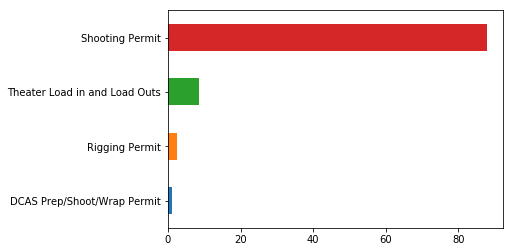

In [16]:
events_pct = df2.EventType.value_counts(normalize=True)*100
events_pct.sort_values().plot(kind='barh')

In [17]:
df2.Category.value_counts(normalize=True)*100

Television             53.586235
Film                   17.566335
Theater                 9.262023
Commercial              8.526119
Still Photography       6.320481
WEB                     3.372720
Student                 0.657131
Documentary             0.393864
Music Video             0.313018
Red Carpet/Premiere     0.002073
Name: Category, dtype: float64

In [18]:
cat_pct = df2.Category.value_counts(normalize=True)*100
cat_pct = pd.DataFrame(cat_pct)
cat_pct
#cat_pct.sort_values().plot(kind='barh')

,Category
Television,53.586235
Film,17.566335
Theater,9.262023
Commercial,8.526119
Still Photography,6.320481
WEB,3.372720
Student,0.657131
Documentary,0.393864
Music Video,0.313018
Red Carpet/Premiere,0.002073


In [19]:
cat_pct.reset_index()

,index,Category
0,Television,53.586235
1,Film,17.566335
2,Theater,9.262023
3,Commercial,8.526119
4,Still Photography,6.320481
5,WEB,3.372720
6,Student,0.657131
7,Documentary,0.393864
8,Music Video,0.313018
9,Red Carpet/Premiere,0.002073


In [20]:
cat_pct = cat_pct.T
cat_pct

,Television,Film,Theater,Commercial,Still Photography,WEB,Student,Documentary,Music Video,Red Carpet/Premiere
Category,53.586235,17.566335,9.262023,8.526119,6.320481,3.37272,0.657131,0.393864,0.313018,0.002073


In [21]:
new = cat_pct[['Student','Documentary','Music Video','Red Carpet/Premiere']].copy()
new['total']=new.sum(axis=1)
new

,Student,Documentary,Music Video,Red Carpet/Premiere,total
Category,0.657131,0.393864,0.313018,0.002073,1.366086


In [22]:
cat_pct['other'] = new['total']
cat_pct

,Television,Film,Theater,Commercial,Still Photography,WEB,Student,Documentary,Music Video,Red Carpet/Premiere,other
Category,53.586235,17.566335,9.262023,8.526119,6.320481,3.37272,0.657131,0.393864,0.313018,0.002073,1.366086


In [23]:
cat_pct = cat_pct[['Television','Film','Theater','Commercial','Still Photography','WEB','other']].copy()
cat_pct

,Television,Film,Theater,Commercial,Still Photography,WEB,other
Category,53.586235,17.566335,9.262023,8.526119,6.320481,3.37272,1.366086


In [24]:
cat_pct = cat_pct.T
cat_pct

,Category
Television,53.586235
Film,17.566335
Theater,9.262023
Commercial,8.526119
Still Photography,6.320481
WEB,3.372720
other,1.366086


In [25]:
plt.rcdefaults()
plt.rcParams.update({
    #ERROR: 'NameError: name 'cycler' is not defined'
    'axes.prop_cycle': cycler('color', ['#DF2860']),
    'pdf.fonttype':42,
    'axes.facecolor': '#EDEDED',  #FBD008, #FFA221
    'savefig.facecolor': '#EDEDED', 
    'figure.facecolor': '#EDEDED', ##35324 #9D2E01
    'axes.spines.left': True,
    'axes.spines.bottom': True,
    'axes.spines.top': False,
    'axes.spines.right': False,
    #'axes.grid':True
#   'grid.color':'#ffffff',
#   'grid.linewidth':2,
#    'grid.alpha':0.6,
    'xtick.top': False,
    'xtick.bottom': True,
    'xtick.color': '#000000',
    'ytick.color':'#000000',
    #'ytick.bottom': True,
    #'ytick.color': 'black'
    #'xtick.major.size': 7,
    #'xtick.major.width': 3,
    #'xtick.major.pad': 0,
    #'xtick.direction': 'in',
    'xtick.labelsize': 'large',
    'ytick.labelsize': 'large',
    'legend.loc': 'best',
    'legend.frameon': False,
    'legend.fontsize': 'small',
    'legend.handlelength': 0.5,
    'legend.handleheight': 0.5,
    #'legend.columnspacing': 2.0,
    'font.family': 'Segoe UI Symbol',
    'font.size':14,
    'text.color':'#000000'
     })

In [26]:
bar_colors = ['#DF2860','#FBBB97','#9C6C7A','#FFEDAF','#4D184C','#F9E3CB','#64D9E2','#5691A1','#182A42','#4B1026','#056561','#4C4C4C']

0
1
2
3
4
5
6


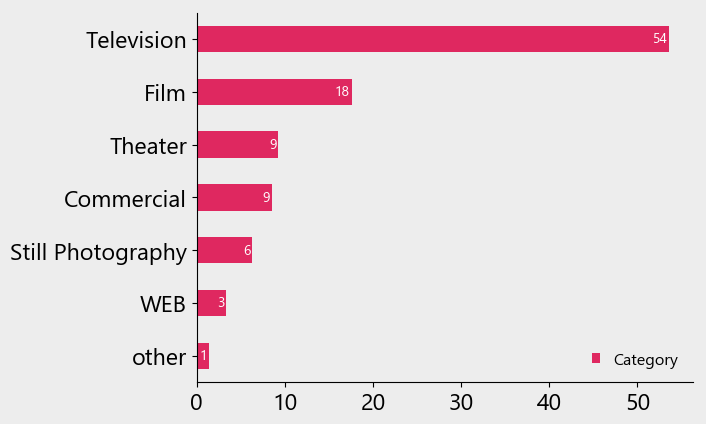

In [27]:
ax = cat_pct.sort_values(by='Category').plot(kind='barh',color='#DF2860')

for i, bar in enumerate(ax.patches):
    #print(bar.get_width())
    print(i)
    value= int(round(bar.get_width()))
    x_pos = bar.get_width() - 0.2
    y_pos = i 
    ax.text(x_pos,y_pos,value,va='center',ha='right',color='white',fontweight='bold',fontsize=10)
    
plt.savefig('categories.pdf')
plt.show()

In [28]:
#df2.loc[(df['column_name'] == some_value) & df2['other_column'].isin(some_values)]

In [29]:
tv = df2.loc[(df['Category'] == 'Television')]
tv.head()

,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,ZipCode(s),year,month
0,300134,Shooting Permit,07/18/2016 06:00...,07/18/2016 12:00...,07/13/2016 10:28...,Mayor's Office o...,COLUMBUS AVENUE ...,Manhattan,7,20,Television,Morning Show,United States of...,10023,2016,07
1,299797,Shooting Permit,07/18/2016 07:00...,07/18/2016 07:00...,07/11/2016 06:49...,Mayor's Office o...,22 STREET betwee...,Queens,2,108,Television,Cable-episodic,United States of...,11101,2016,07
2,300179,Shooting Permit,07/18/2016 07:00...,07/18/2016 10:00...,07/13/2016 12:11...,Mayor's Office o...,MONITOR STREET b...,Queens,"1, 2","108, 94",Television,Episodic series,United States of...,"11101, 11222, 11378",2016,07
4,300127,Shooting Permit,07/18/2016 06:00...,07/18/2016 11:59...,07/13/2016 10:04...,Mayor's Office o...,10 AVENUE betwee...,Manhattan,4,10,Television,Reality,United States of...,10001,2016,07
5,43547,Shooting Permit,01/10/2012 07:00...,01/10/2012 07:00...,01/04/2012 12:25...,Mayor's Office o...,EAGLE STREET bet...,Brooklyn,"1, 2","108, 94",Television,Episodic series,United States of...,"11101, 11222",2012,01


In [30]:
tv.SubCategoryName.value_counts(normalize=True)*100

Episodic series            56.131528
Cable-episodic             19.721470
Pilot                       4.978723
News                        4.174081
Cable-other                 2.305609
Reality                     2.174081
Not Applicable              2.023211
Morning Show                1.969052
Made for TV/mini-series     1.620890
Special/Awards Show         1.187621
Variety                     1.067698
Talk Show                   1.056093
Cable-daily                 0.765957
Game show                   0.348162
Children                    0.181818
Syndication/First Run       0.170213
Daytime soap                0.077369
Magazine Show               0.046422
Name: SubCategoryName, dtype: float64

In [31]:
tv_sub = tv.groupby('Category').SubCategoryName.value_counts().unstack().reset_index().fillna(0)
tv_sub.head()

SubCategoryName,Category,Cable-daily,Cable-episodic,Cable-other,Children,Daytime soap,Episodic series,Game show,Made for TV/mini-series,Magazine Show,Morning Show,News,Not Applicable,Pilot,Reality,Special/Awards Show,Syndication/First Run,Talk Show,Variety
0,Television,198,5098,596,47,20,14510,90,419,12,509,1079,523,1287,562,307,44,273,276


In [32]:
bar_colors = ['#DF2860','#FBBB97','#9C6C7A','#FFEDAF','#4D184C','#F9E3CB','#64D9E2','#5691A1','#182A42','#4B1026','#056561','#4C4C4C']

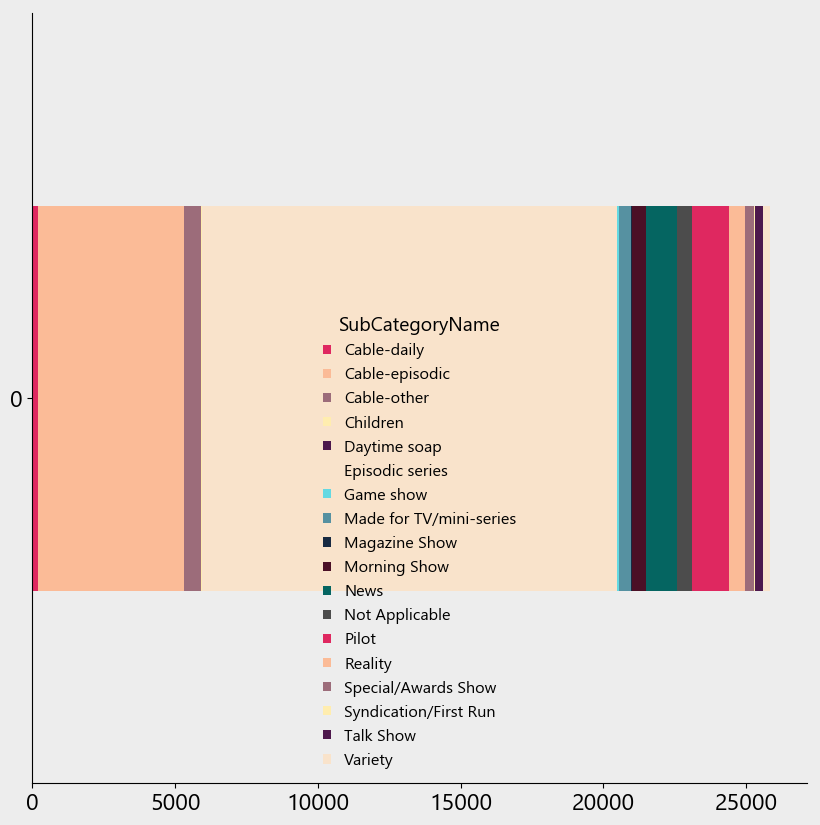

In [33]:
tv_sub.plot(kind='barh',stacked=True,color=bar_colors,figsize=(10,10))

In [34]:
tv_sub_new = tv.groupby('Category').SubCategoryName.value_counts().unstack().reset_index().fillna(0)
tv_sub_new.head()

SubCategoryName,Category,Cable-daily,Cable-episodic,Cable-other,Children,Daytime soap,Episodic series,Game show,Made for TV/mini-series,Magazine Show,Morning Show,News,Not Applicable,Pilot,Reality,Special/Awards Show,Syndication/First Run,Talk Show,Variety
0,Television,198,5098,596,47,20,14510,90,419,12,509,1079,523,1287,562,307,44,273,276


In [35]:
tv_sub_new['total'] = tv_sub_new.sum(axis=1)
tv_sub_new.head()

SubCategoryName,Category,Cable-daily,Cable-episodic,Cable-other,Children,Daytime soap,Episodic series,Game show,Made for TV/mini-series,Magazine Show,Morning Show,News,Not Applicable,Pilot,Reality,Special/Awards Show,Syndication/First Run,Talk Show,Variety,total
0,Television,198,5098,596,47,20,14510,90,419,12,509,1079,523,1287,562,307,44,273,276,25850


In [36]:
tv_sub_new['Cable-daily'] = tv_sub_new['Cable-daily'].replace(198,198*100/tv_sub_new['total'])
tv_sub_new['Cable-episodic'] = tv_sub_new['Cable-episodic'].replace(5098,5098*100/tv_sub_new['total'])
tv_sub_new['Cable-other'] = tv_sub_new['Cable-other'].replace(596,596*100/tv_sub_new['total'])
tv_sub_new['Children'] = tv_sub_new['Children'].replace(47,47*100/tv_sub_new['total'])
tv_sub_new['Daytime soap'] = tv_sub_new['Daytime soap'].replace(20,20*100/tv_sub_new['total'])
tv_sub_new['Episodic series'] = tv_sub_new['Episodic series'].replace(14510,14510*100/tv_sub_new['total'])
tv_sub_new['Game show'] = tv_sub_new['Game show'].replace(90,90*100/tv_sub_new['total'])
tv_sub_new['Made for TV/mini-series'] = tv_sub_new['Made for TV/mini-series'].replace(419,419*100/tv_sub_new['total'])
tv_sub_new['Magazine Show'] = tv_sub_new['Magazine Show'].replace(12,12*100/tv_sub_new['total'])
tv_sub_new['Morning Show'] = tv_sub_new['Morning Show'].replace(509,509*100/tv_sub_new['total'])
tv_sub_new['News'] = tv_sub_new['News'].replace(1079,1079*100/tv_sub_new['total'])
tv_sub_new['Not Applicable'] = tv_sub_new['Not Applicable'].replace(523,523*100/tv_sub_new['total'])
tv_sub_new['Pilot'] = tv_sub_new['Pilot'].replace(1287,1287*100/tv_sub_new['total'])
tv_sub_new['Reality'] = tv_sub_new['Reality'].replace(562,562*100/tv_sub_new['total'])
tv_sub_new['Special/Awards Show'] = tv_sub_new['Special/Awards Show'].replace(307,307*100/tv_sub_new['total'])
tv_sub_new['Syndication/First Run'] = tv_sub_new['Syndication/First Run'].replace(44,44*100/tv_sub_new['total'])
tv_sub_new['Talk Show'] = tv_sub_new['Talk Show'].replace(273,273*100/tv_sub_new['total'])
tv_sub_new['Variety'] = tv_sub_new['Variety'].replace(276,276*100/tv_sub_new['total'])

In [37]:
tv_sub_new.head()

SubCategoryName,Category,Cable-daily,Cable-episodic,Cable-other,Children,Daytime soap,Episodic series,Game show,Made for TV/mini-series,Magazine Show,Morning Show,News,Not Applicable,Pilot,Reality,Special/Awards Show,Syndication/First Run,Talk Show,Variety,total
0,Television,0.765957,19.72147,2.305609,0.181818,0.077369,56.131528,0.348162,1.62089,0.046422,1.969052,4.174081,2.023211,4.978723,2.174081,1.187621,0.170213,1.056093,1.067698,25850


In [38]:
tv_sub_new = tv_sub_new.drop(columns='total')
tv_sub_new.head(1)

SubCategoryName,Category,Cable-daily,Cable-episodic,Cable-other,Children,Daytime soap,Episodic series,Game show,Made for TV/mini-series,Magazine Show,Morning Show,News,Not Applicable,Pilot,Reality,Special/Awards Show,Syndication/First Run,Talk Show,Variety
0,Television,0.765957,19.72147,2.305609,0.181818,0.077369,56.131528,0.348162,1.62089,0.046422,1.969052,4.174081,2.023211,4.978723,2.174081,1.187621,0.170213,1.056093,1.067698


In [39]:
tv_sub_new['total']=tv_sub_new.sum(axis=1)
tv_sub_new.head(1)

SubCategoryName,Category,Cable-daily,Cable-episodic,Cable-other,Children,Daytime soap,Episodic series,Game show,Made for TV/mini-series,Magazine Show,Morning Show,News,Not Applicable,Pilot,Reality,Special/Awards Show,Syndication/First Run,Talk Show,Variety,total
0,Television,0.765957,19.72147,2.305609,0.181818,0.077369,56.131528,0.348162,1.62089,0.046422,1.969052,4.174081,2.023211,4.978723,2.174081,1.187621,0.170213,1.056093,1.067698,100.0


In [40]:
tv_sub_new = tv_sub_new.drop(columns='total')
tv_sub_new.head(1)

SubCategoryName,Category,Cable-daily,Cable-episodic,Cable-other,Children,Daytime soap,Episodic series,Game show,Made for TV/mini-series,Magazine Show,Morning Show,News,Not Applicable,Pilot,Reality,Special/Awards Show,Syndication/First Run,Talk Show,Variety
0,Television,0.765957,19.72147,2.305609,0.181818,0.077369,56.131528,0.348162,1.62089,0.046422,1.969052,4.174081,2.023211,4.978723,2.174081,1.187621,0.170213,1.056093,1.067698


In [41]:
bar_colors = ['#AB716D','#FBBB97','#9C6C7A','#FFBCC8','#4D184C','#F9E3CB','#64D9E2','#5691A1','#182A42','#4B1026','#056561','#AEAAAB','#DF2860','#E2BF49','#9F2522','#4C4C4C','#40719A','#E4849F']

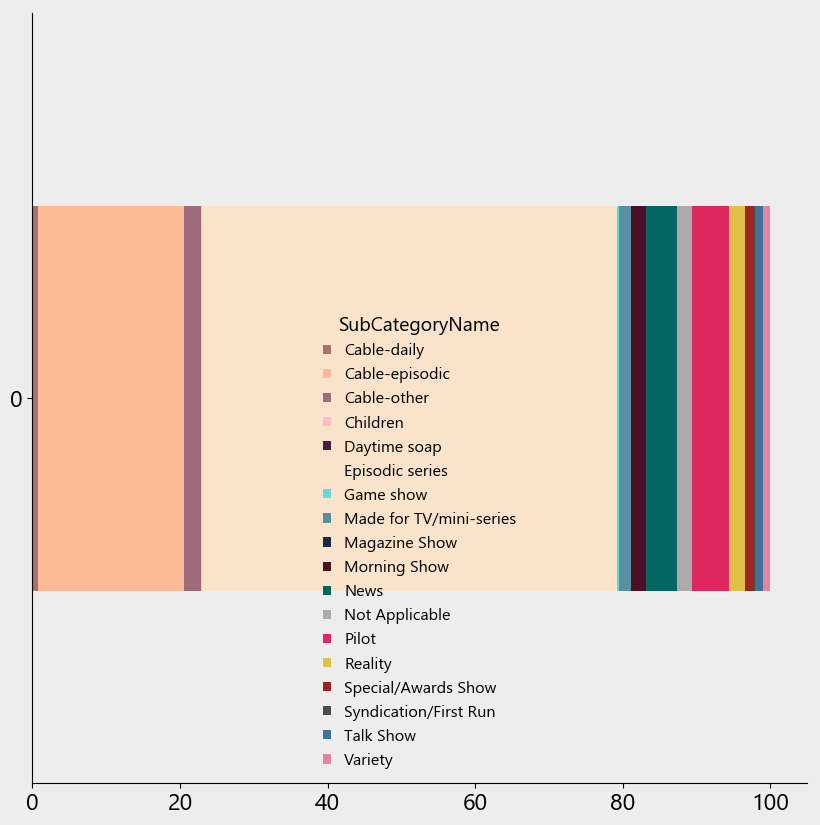

In [42]:
tv_sub_new.plot(kind='barh',stacked=True,color=bar_colors,figsize=(10,10))

plt.savefig('tv-sub.pdf')

In [43]:
film = df2.loc[(df['Category'] == 'Film')]
film.head()

,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,ZipCode(s),year,month
10,297653,Shooting Permit,07/18/2016 06:30...,07/18/2016 05:00...,06/29/2016 09:32...,Mayor's Office o...,GRAND STREET bet...,Brooklyn,1,90,Film,Short,United States of...,11211,2016,07
11,300432,Shooting Permit,07/17/2016 04:00...,07/18/2016 07:00...,07/14/2016 11:18...,Mayor's Office o...,BLAKE AVENUE bet...,Brooklyn,16,73,Film,Feature,United States of...,11212,2016,07
16,299892,Shooting Permit,07/18/2016 06:00...,07/18/2016 10:00...,07/12/2016 10:49...,Mayor's Office o...,EXCHANGE PLACE b...,Manhattan,1,1,Film,Feature,United States of...,"10004, 10005",2016,07
17,300423,Shooting Permit,07/18/2016 07:00...,07/18/2016 09:00...,07/14/2016 10:58...,Mayor's Office o...,34 AVENUE betwee...,Queens,1,114,Film,Feature,United States of...,11106,2016,07
28,300200,Shooting Permit,07/18/2016 06:00...,07/18/2016 10:00...,07/13/2016 01:11...,Mayor's Office o...,ST LUKES PLACE b...,Manhattan,2,6,Film,Feature,United States of...,10014,2016,07


In [44]:
tv_film = tv.append([film])
tv_film.tail(50)

,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,ZipCode(s),year,month
50550,69603,Shooting Permit,08/18/2012 06:00...,08/18/2012 06:00...,08/16/2012 12:35...,Mayor's Office o...,MARBLE HILL AVEN...,Bronx,"12, 8","34, 50",Film,Feature,United States of...,"10040, 10463",2012,08
50553,111551,Shooting Permit,07/09/2013 06:30...,07/09/2013 07:30...,07/04/2013 04:57...,Mayor's Office o...,PACIFIC STREET b...,Brooklyn,8,77,Film,Not Applicable,United States of...,11238,2013,07
50557,254118,Shooting Permit,11/18/2015 06:00...,11/18/2015 11:59...,11/16/2015 09:34...,Mayor's Office o...,53 STREET betwee...,Brooklyn,7,72,Film,Feature,United States of...,"11220, 11232",2015,11
50564,162277,Shooting Permit,06/03/2014 06:00...,06/03/2014 11:00...,05/28/2014 12:48...,Mayor's Office o...,WEST 26 STREET...,Manhattan,4,10,Film,Feature,United States of...,10001,2014,06
50566,84086,Shooting Permit,01/24/2013 01:00...,01/25/2013 01:00...,01/18/2013 10:35...,Mayor's Office o...,BRIGHTON 4 ST...,Brooklyn,13,60,Film,Feature,United States of...,11235,2013,01
50580,176103,Shooting Permit,08/13/2014 07:00...,08/13/2014 10:00...,08/08/2014 05:35...,Mayor's Office o...,RIVERSIDE DRIVE ...,Manhattan,9,26,Film,Feature,United States of...,"10025, 10027",2014,08
50586,142551,Shooting Permit,02/21/2014 06:00...,02/21/2014 10:00...,02/19/2014 01:28...,Mayor's Office o...,PROVOST STREET b...,Brooklyn,1,94,Film,Not Applicable,United States of...,11222,2014,02
50588,241002,Shooting Permit,08/20/2015 01:00...,08/21/2015 02:00...,08/17/2015 12:50...,Mayor's Office o...,UNION STREET bet...,Brooklyn,9,71,Film,Feature,United States of...,11225,2015,08
50591,287003,Rigging Permit,05/17/2016 07:00...,05/17/2016 07:00...,05/12/2016 03:41...,Mayor's Office o...,FLATBUSH AVENUE ...,Brooklyn,14,70,Film,Feature,United States of...,11226,2016,05
50602,165078,Shooting Permit,06/12/2014 07:00...,06/12/2014 07:00...,06/10/2014 12:27...,Mayor's Office o...,WEST 19 STREET...,Manhattan,4,10,Film,Feature,United States of...,10011,2014,06


In [45]:
tv_film2 = tv_film[['Category','year']].copy()
tv_film2.head(2)

,Category,year
0,Television,2016
1,Television,2016


In [46]:
tv_film2 = tv_film2.groupby('year').Category.value_counts().unstack().reset_index().fillna(0)
tv_film2.head(10)

Category,year,Film,Television
0,2012,1445,3307
1,2013,2069,3645
2,2014,1172,4497
3,2015,1441,5027
4,2016,1035,4768
5,2017,1312,4606


In [47]:
tv_film2.dtypes

Category
year          object
Film           int64
Television     int64
dtype: object

In [48]:
bar_colors = ['#9C6C7A','#5691A1']

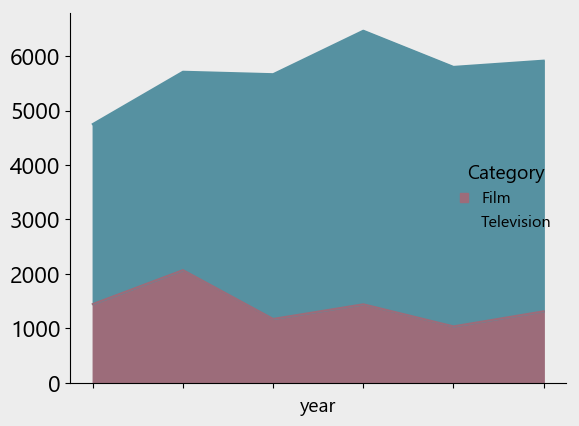

In [49]:
tv_film2.plot(kind='area',x='year',color=bar_colors)

ax.set_yticks([0,1000,2000,3000,4000,5000,6000,7000,8000])
ax.set_yticklabels(['','1000','2000','3000','4000','5000','6000','7000','8000'])
#ax.set_xlim(0,8000)
# ax.set_yticks([2012,2013,2014,2015,2016,2017])
# ax.set_yticklabels(['2012','2013','2014','2015','2016','2017'])

plt.savefig('tv-film.pdf')
plt.show()

In [50]:
#tv_film.groupby('Category').plot(kind='line',x='year',y='Category')

In [51]:
#film.SubCategoryName.value_counts(normalize=True)*100

In [52]:
#df.loc[(df['Category'] == 'Television') & df['Category'].isin('Film')].head(20)

In [53]:
cat_sub = df2.groupby('Category').SubCategoryName.value_counts().unstack().reset_index().fillna(0)
cat_sub.head()

SubCategoryName,Category,Cable-daily,Cable-episodic,Cable-other,Children,Commercial,Daytime soap,Episodic series,Feature,Game show,...,Short,Signed Artist,Special/Awards Show,Student Film,Syndication/First Run,TV Premiere,Talk Show,Theater,Trailers,Variety
0,Commercial,0.0,0.0,0.0,0.0,3282.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
1,Documentary,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Film,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6894.0,0.0,...,544.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Music Video,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Red Carpet/Premiere,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [54]:
df2.year.value_counts()

2015    8958
2017    8222
2016    8094
2013    8094
2014    7962
2012    6910
Name: year, dtype: int64

In [55]:
df2.month.value_counts().sort_index(ascending=True)

01    2808
02    3153
03    3935
04    3680
05    3677
06    3790
07    4246
08    4552
09    4510
10    5516
11    4768
12    3605
Name: month, dtype: int64

In [56]:
monthly = df2.groupby('month').year.value_counts()
monthly_new = monthly.unstack().reset_index()

In [57]:
monthly_new= pd.DataFrame(monthly_new)

In [58]:
monthly_new.sum(axis=0)

year
month    1.020304e+22
2012     6.910000e+03
2013     8.094000e+03
2014     7.962000e+03
2015     8.958000e+03
2016     8.094000e+03
2017     8.222000e+03
dtype: float64

In [59]:
monthly_new.sum(axis=1)

0     2808
1     3153
2     3935
3     3680
4     3677
5     3790
6     4246
7     4552
8     4510
9     5516
10    4768
11    3605
dtype: int64

In [60]:
monthly_new.head()

year,month,2012,2013,2014,2015,2016,2017
0,01,385,447,418,516,482,560
1,02,502,439,464,652,526,570
2,03,626,540,598,808,731,632
3,04,623,599,563,643,682,570
4,05,639,679,575,694,592,498


In [61]:
monthly_new.set_index('month', inplace=True)

In [62]:
monthly_new.head()

year,2012,2013,2014,2015,2016,2017
month,,,,,,
01,385,447,418,516,482,560
02,502,439,464,652,526,570
03,626,540,598,808,731,632
04,623,599,563,643,682,570
05,639,679,575,694,592,498


In [63]:
#monthly_new.dtypes()

In [64]:
bar_colors = ['#DF2860','#FBBB97','#9C6C7A','#FFEDAF','#4D184C','#F9E3CB','#64D9E2','#5691A1','#182A42','#4B1026','#056561','#4C4C4C']

C:\Users\kellykiki\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\plotting\_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


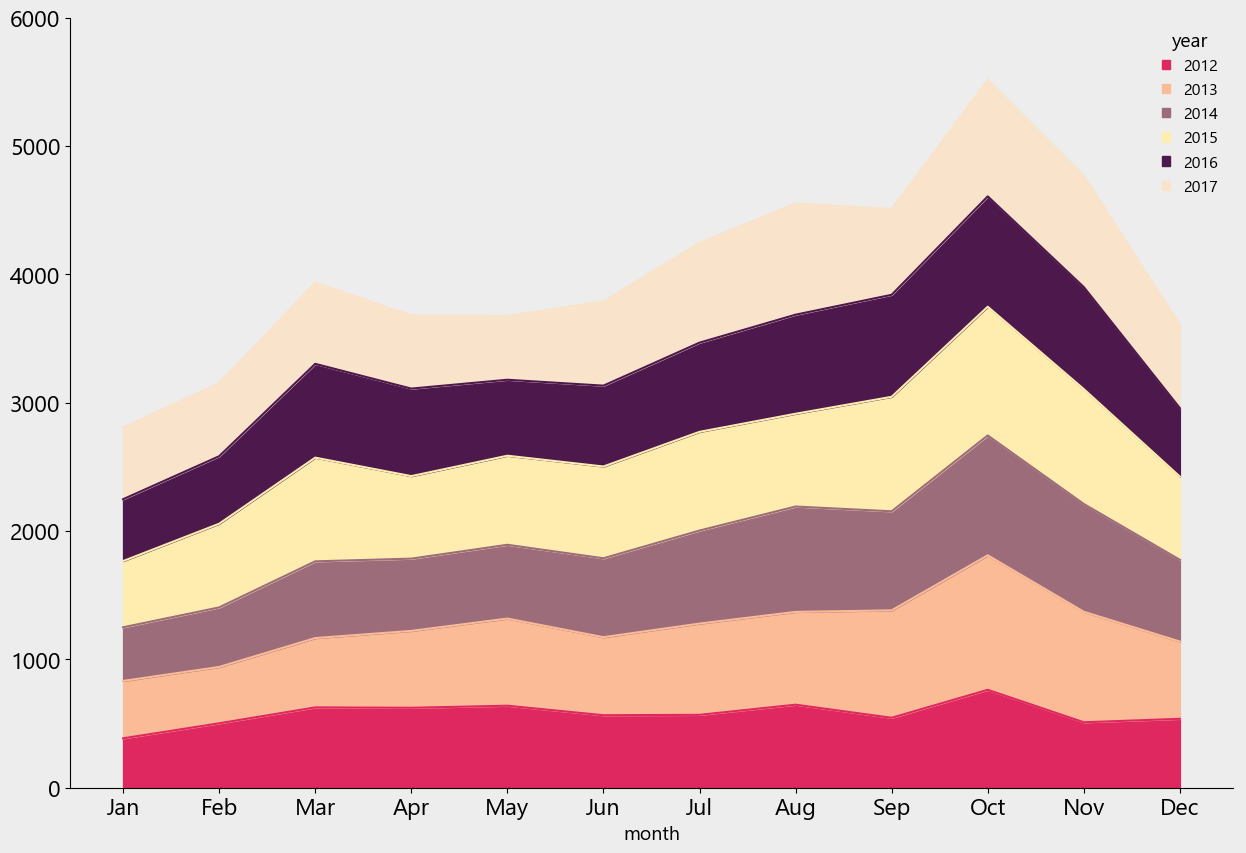

In [65]:
ax = monthly_new.plot(kind='area',figsize=(15,10),colors=bar_colors)

ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11])
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],color='#000000')

ax.set_yticks([0,1000,2000,3000,4000,5000,6000])
ax.set_yticklabels(['0','1000','2000','3000','4000','5000','6000'],color='#000000')

plt.savefig('peryear.pdf')

In [66]:
areas = df2.Borough.value_counts()
areas

Manhattan        24223
Brooklyn         14615
Queens            7510
Bronx             1292
Staten Island      600
Name: Borough, dtype: int64

In [67]:
areas_pct = df2.Borough.value_counts(normalize=True)*100
areas_pct

Manhattan        50.213516
Brooklyn         30.296434
Queens           15.567993
Bronx             2.678275
Staten Island     1.243781
Name: Borough, dtype: float64

In [68]:
hoods = df2.groupby('Borough').Category.value_counts().unstack().fillna(0).reset_index()
hoods.head(1)

Category,Borough,Commercial,Documentary,Film,Music Video,Red Carpet/Premiere,Still Photography,Student,Television,Theater,WEB
0,Bronx,116.0,9.0,333.0,4.0,0.0,46.0,11.0,746.0,8.0,19.0


In [69]:
hoods['total'] = hoods.sum(axis=1)
hoods = hoods.sort_values(by='total',ascending=True)
hoods.head()

Category,Borough,Commercial,Documentary,Film,Music Video,Red Carpet/Premiere,Still Photography,Student,Television,Theater,WEB,total
4,Staten Island,31.0,0.0,184.0,1.0,0.0,2.0,7.0,372.0,1.0,2.0,600.0
0,Bronx,116.0,9.0,333.0,4.0,0.0,46.0,11.0,746.0,8.0,19.0,1292.0
3,Queens,259.0,9.0,1036.0,13.0,0.0,113.0,26.0,5840.0,9.0,205.0,7510.0
1,Brooklyn,1181.0,43.0,3019.0,58.0,0.0,901.0,102.0,8127.0,634.0,550.0,14615.0
2,Manhattan,2526.0,129.0,3902.0,75.0,1.0,1987.0,171.0,10765.0,3816.0,851.0,24223.0


In [70]:
hoods.drop(columns='total',inplace=True)
hoods.head(2)

Category,Borough,Commercial,Documentary,Film,Music Video,Red Carpet/Premiere,Still Photography,Student,Television,Theater,WEB
4,Staten Island,31.0,0.0,184.0,1.0,0.0,2.0,7.0,372.0,1.0,2.0
0,Bronx,116.0,9.0,333.0,4.0,0.0,46.0,11.0,746.0,8.0,19.0


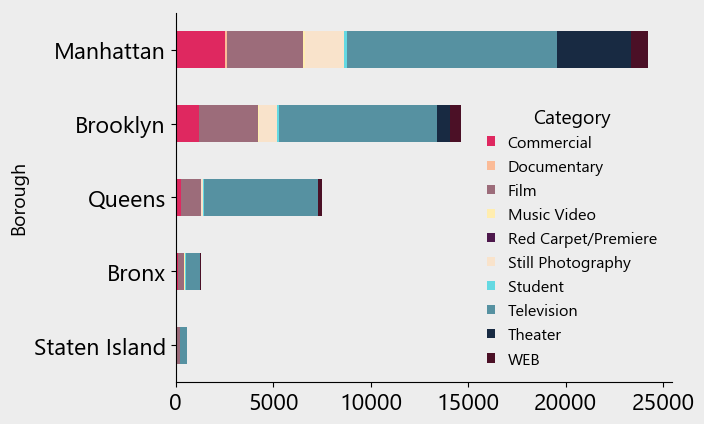

In [71]:
hoods.plot(kind='barh',stacked=True,x='Borough',color=bar_colors)

ax.tick_params(left=False)

plt.savefig('areas-categories.pdf')
plt.show()

In [72]:
films = df2[df2.Category.str.contains("Film", case=False, na=False)]
films.head(50)

,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,ZipCode(s),year,month
10,297653,Shooting Permit,07/18/2016 06:30...,07/18/2016 05:00...,06/29/2016 09:32...,Mayor's Office o...,GRAND STREET bet...,Brooklyn,1,90,Film,Short,United States of...,11211,2016,07
11,300432,Shooting Permit,07/17/2016 04:00...,07/18/2016 07:00...,07/14/2016 11:18...,Mayor's Office o...,BLAKE AVENUE bet...,Brooklyn,16,73,Film,Feature,United States of...,11212,2016,07
16,299892,Shooting Permit,07/18/2016 06:00...,07/18/2016 10:00...,07/12/2016 10:49...,Mayor's Office o...,EXCHANGE PLACE b...,Manhattan,1,1,Film,Feature,United States of...,"10004, 10005",2016,07
17,300423,Shooting Permit,07/18/2016 07:00...,07/18/2016 09:00...,07/14/2016 10:58...,Mayor's Office o...,34 AVENUE betwee...,Queens,1,114,Film,Feature,United States of...,11106,2016,07
28,300200,Shooting Permit,07/18/2016 06:00...,07/18/2016 10:00...,07/13/2016 01:11...,Mayor's Office o...,ST LUKES PLACE b...,Manhattan,2,6,Film,Feature,United States of...,10014,2016,07
51,300304,Shooting Permit,07/19/2016 06:00...,07/19/2016 09:00...,07/13/2016 04:17...,Mayor's Office o...,WARREN STREET be...,Manhattan,1,1,Film,Feature,United States of...,10007,2016,07
53,300974,Shooting Permit,07/19/2016 06:00...,07/19/2016 10:00...,07/17/2016 10:13...,Mayor's Office o...,ST LUKES PLACE b...,Manhattan,2,6,Film,Feature,United States of...,10014,2016,07
54,300715,Shooting Permit,07/19/2016 07:00...,07/19/2016 09:00...,07/15/2016 12:17...,Mayor's Office o...,VERNON BOULEVARD...,Queens,1,114,Film,Feature,United States of...,11101,2016,07
67,300634,Shooting Permit,07/20/2016 06:00...,07/20/2016 10:00...,07/14/2016 11:30...,Mayor's Office o...,BLAKE AVENUE bet...,Brooklyn,16,73,Film,Feature,United States of...,11212,2016,07
74,300305,Shooting Permit,07/20/2016 06:00...,07/20/2016 09:00...,07/13/2016 04:17...,Mayor's Office o...,WARREN STREET be...,Manhattan,1,1,Film,Feature,United States of...,10007,2016,07


In [77]:
films['street'] = films['ParkingHeld'].str.extract(r"^(.*?) between")
films.head()

C:\Users\kellykiki\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,ZipCode(s),year,month,street
10,297653,Shooting Permit,07/18/2016 06:30...,07/18/2016 05:00...,06/29/2016 09:32...,Mayor's Office o...,GRAND STREET bet...,Brooklyn,1,90,Film,Short,United States of...,11211,2016,07,GRAND STREET
11,300432,Shooting Permit,07/17/2016 04:00...,07/18/2016 07:00...,07/14/2016 11:18...,Mayor's Office o...,BLAKE AVENUE bet...,Brooklyn,16,73,Film,Feature,United States of...,11212,2016,07,BLAKE AVENUE
16,299892,Shooting Permit,07/18/2016 06:00...,07/18/2016 10:00...,07/12/2016 10:49...,Mayor's Office o...,EXCHANGE PLACE b...,Manhattan,1,1,Film,Feature,United States of...,"10004, 10005",2016,07,EXCHANGE PLACE
17,300423,Shooting Permit,07/18/2016 07:00...,07/18/2016 09:00...,07/14/2016 10:58...,Mayor's Office o...,34 AVENUE betwee...,Queens,1,114,Film,Feature,United States of...,11106,2016,07,34 AVENUE
28,300200,Shooting Permit,07/18/2016 06:00...,07/18/2016 10:00...,07/13/2016 01:11...,Mayor's Office o...,ST LUKES PLACE b...,Manhattan,2,6,Film,Feature,United States of...,10014,2016,07,ST LUKES PLACE


In [78]:
films_graph = films.street.value_counts().reset_index().sort_values(by='street',ascending=True)
#films_graph.reset_index()
films_graph

,index,street
1562,JORALEMON ST,1
1176,OLIVER STREET,1
1177,14 PLACE,1
1178,38 AVENUE,1
1179,AVENUE H,1
1180,EAST 65 STREET,1
1181,GARDNER AVENUE,1
1182,WATTS STREET,1
1183,PALMETTO ST,1
1184,EAST 20TH ST,1


In [79]:
fgraph = films_graph.tail(10)
#manh = manh.sort_values(by='street',ascending=True)
fgraph

,index,street
9,MADISON AVENUE,51
8,WEST 44 STREET,54
7,WATER STREET,57
6,LAUREL HILL BOUL...,58
5,7 AVENUE,58
4,35 STREET,61
3,RIVERSIDE DRIVE,63
2,INGRAHAM STREET,72
1,5 AVENUE,111
0,BROADWAY,153


In [80]:
fgraph1 = fgraph.sort_values(by='street',ascending=False)
fgraph1

,index,street
0,BROADWAY,153
1,5 AVENUE,111
2,INGRAHAM STREET,72
3,RIVERSIDE DRIVE,63
4,35 STREET,61
6,LAUREL HILL BOUL...,58
5,7 AVENUE,58
7,WATER STREET,57
8,WEST 44 STREET,54
9,MADISON AVENUE,51


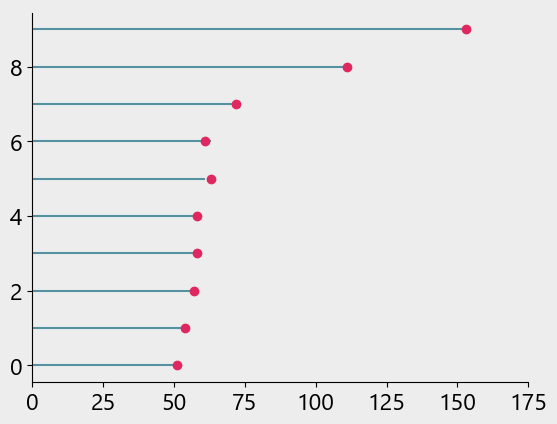

In [81]:
fig, ax = plt.subplots()

ax.hlines(fgraph1.index.sort_values(ascending=False), xmin=0, xmax=fgraph1.street,color='#5691A1')
ax.plot(fgraph1.street.sort_values(ascending=True), fgraph1.index, "o", color='#DF2860')
ax.set_xlim(0, 175)

plt.savefig('top-10-streets-shootings.pdf')
plt.show()

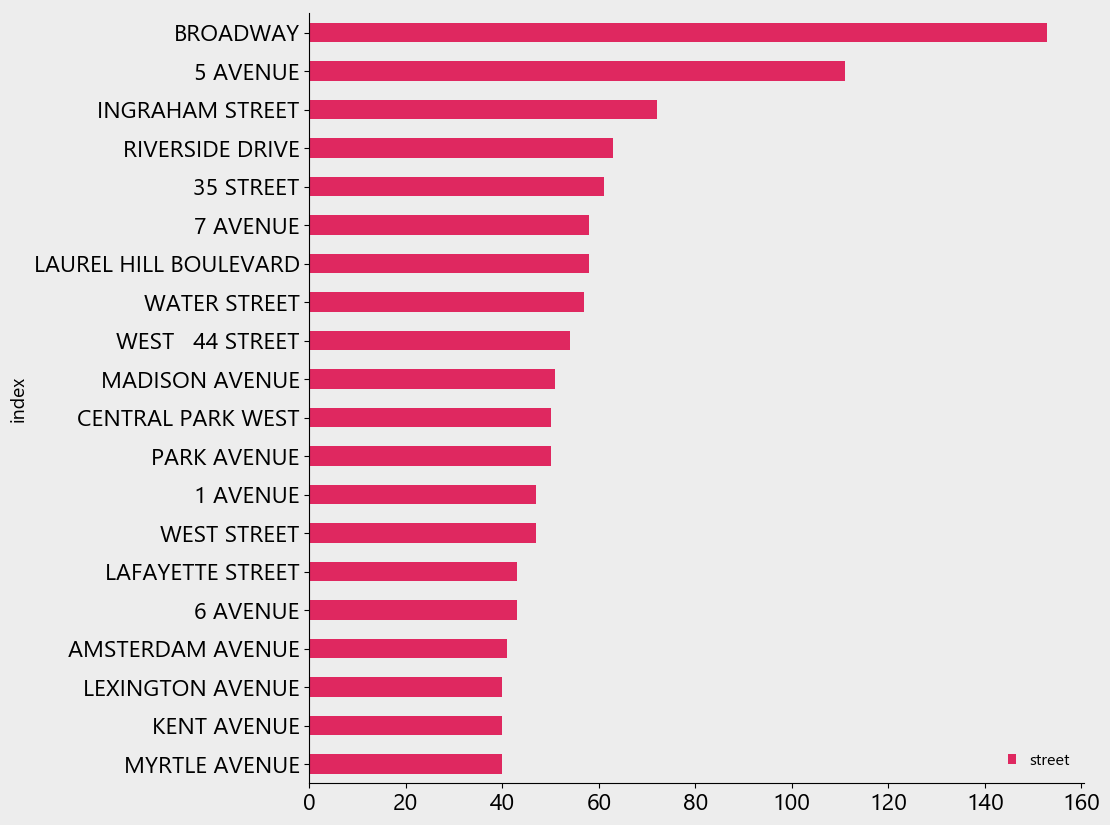

In [82]:
films.street.value_counts().reset_index().sort_values(by='street',ascending=True).tail(20).plot(kind='barh',x='index',figsize=(10,10))

(0, 160)

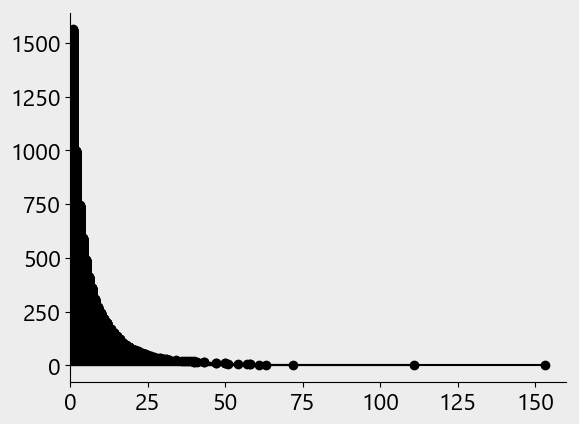

In [83]:
fig, ax = plt.subplots()

ax.hlines(films_graph.index, xmin=0, xmax=films_graph.street)
ax.plot(films_graph.street, films_graph.index, "o", color='black')
ax.set_xlim(0, 160)

In [84]:
Manhattan_films = films[films.Borough.str.contains("Manhattan",case=False,na=False)]
Manhattan_films.head(3)

,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,ZipCode(s),year,month,street
16,299892,Shooting Permit,07/18/2016 06:00...,07/18/2016 10:00...,07/12/2016 10:49...,Mayor's Office o...,EXCHANGE PLACE b...,Manhattan,1,1,Film,Feature,United States of...,"10004, 10005",2016,07,EXCHANGE PLACE
28,300200,Shooting Permit,07/18/2016 06:00...,07/18/2016 10:00...,07/13/2016 01:11...,Mayor's Office o...,ST LUKES PLACE b...,Manhattan,2,6,Film,Feature,United States of...,10014,2016,07,ST LUKES PLACE
51,300304,Shooting Permit,07/19/2016 06:00...,07/19/2016 09:00...,07/13/2016 04:17...,Mayor's Office o...,WARREN STREET be...,Manhattan,1,1,Film,Feature,United States of...,10007,2016,07,WARREN STREET


In [85]:
Manhattan_films.street.value_counts().head(20)

BROADWAY             115
5 AVENUE              84
RIVERSIDE DRIVE       63
WEST   44 STREET      54
MADISON AVENUE        51
CENTRAL PARK WEST     50
PARK AVENUE           49
LAFAYETTE STREET      43
6 AVENUE              41
AMSTERDAM AVENUE      41
LEXINGTON AVENUE      36
WEST   43 STREET      36
1 AVENUE              36
WATER STREET          32
7 AVENUE              32
WEST   46 STREET      31
GREENWICH STREET      30
WEST   58 STREET      30
EAST   24 STREET      29
11 AVENUE             27
Name: street, dtype: int64

In [86]:
Manhattan_films.street.value_counts().reset_index().sort_values(by='street',ascending=True)

,index,street
578,TENTH AVENUE,1
470,WEST 182 STREET,1
469,EAST 79 STREET,1
468,RIDGE STREET,1
467,WEST 84 STREET,1
466,WEST 152 STREET,1
465,Broadway,1
464,WEST 45TH STREET,1
463,1st Avenue,1
462,ROBERT WAGNER DRIVE,1


In [195]:
manh = Manhattan_films.street.value_counts().reset_index().sort_values(by='street',ascending=True).tail(5)
#manh = manh.sort_values(by='street',ascending=True)
manh

,index,street
4,MADISON AVENUE,51
3,WEST 44 STREET,54
2,RIVERSIDE DRIVE,63
1,5 AVENUE,84
0,BROADWAY,115


In [196]:
manh1 = manh.sort_values(by='street',ascending=False)
manh1

,index,street
0,BROADWAY,115
1,5 AVENUE,84
2,RIVERSIDE DRIVE,63
3,WEST 44 STREET,54
4,MADISON AVENUE,51


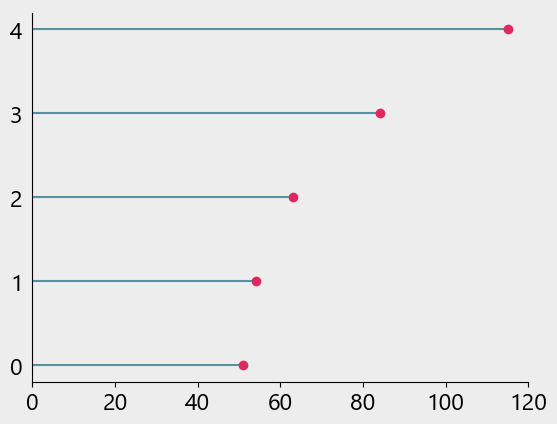

In [206]:
fig, ax = plt.subplots()

ax.hlines(manh1.index.sort_values(ascending=False), xmin=0, xmax=manh1.street,color='#5691A1')
ax.plot(manh1.street.sort_values(ascending=True), manh1.index, "o", color='#DF2860')
ax.set_xlim(0, 120)

ax.tick_params(left=False)

plt.savefig('manhattan.pdf')
plt.show()

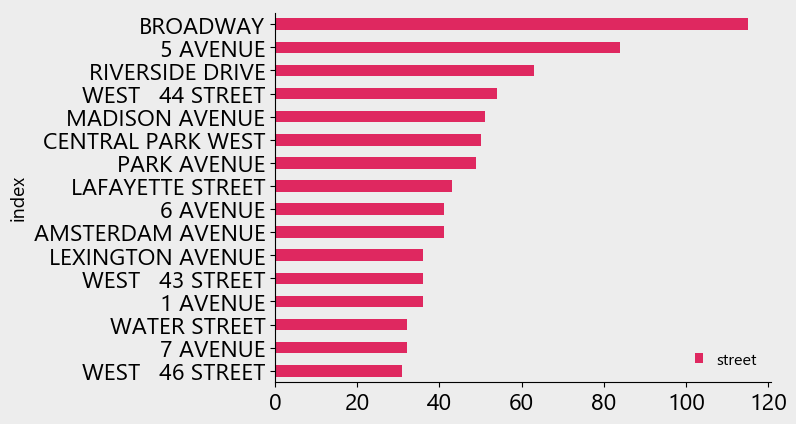

In [90]:
Manhattan_films.street.value_counts().reset_index().sort_values(by='street',ascending=True).tail(16).plot(kind='barh',x='index')

In [91]:
Brooklyn_films = films[films.Borough.str.contains("Brooklyn",case=False,na=False)]
Brooklyn_films.head(3)

,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,ZipCode(s),year,month,street
10,297653,Shooting Permit,07/18/2016 06:30...,07/18/2016 05:00...,06/29/2016 09:32...,Mayor's Office o...,GRAND STREET bet...,Brooklyn,1,90,Film,Short,United States of...,11211,2016,07,GRAND STREET
11,300432,Shooting Permit,07/17/2016 04:00...,07/18/2016 07:00...,07/14/2016 11:18...,Mayor's Office o...,BLAKE AVENUE bet...,Brooklyn,16,73,Film,Feature,United States of...,11212,2016,07,BLAKE AVENUE
67,300634,Shooting Permit,07/20/2016 06:00...,07/20/2016 10:00...,07/14/2016 11:30...,Mayor's Office o...,BLAKE AVENUE bet...,Brooklyn,16,73,Film,Feature,United States of...,11212,2016,07,BLAKE AVENUE


In [198]:
broo = Brooklyn_films.street.value_counts().reset_index().sort_values(by='street',ascending=True).tail(5)
broo

,index,street
4,BROADWAY,33
3,WESTMINSTER ROAD,34
2,WEST STREET,36
1,KENT AVENUE,38
0,INGRAHAM STREET,72


In [199]:
broo1 = broo.sort_values(by='street',ascending=False)
broo1

,index,street
0,INGRAHAM STREET,72
1,KENT AVENUE,38
2,WEST STREET,36
3,WESTMINSTER ROAD,34
4,BROADWAY,33


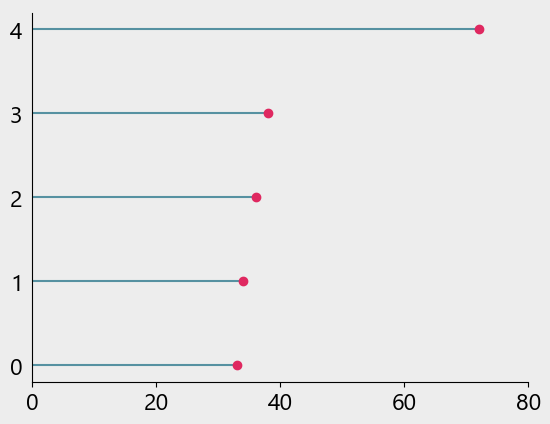

In [205]:
fig, ax = plt.subplots()

ax.hlines(broo1.index.sort_values(ascending=False), xmin=0, xmax=broo1.street,color='#5691A1')
ax.plot(broo1.street.sort_values(ascending=True), broo1.index, "o", color='#DF2860')
ax.set_xlim(0, 80)

ax.tick_params(left=False)

plt.savefig('brooklyn.pdf')
plt.show()

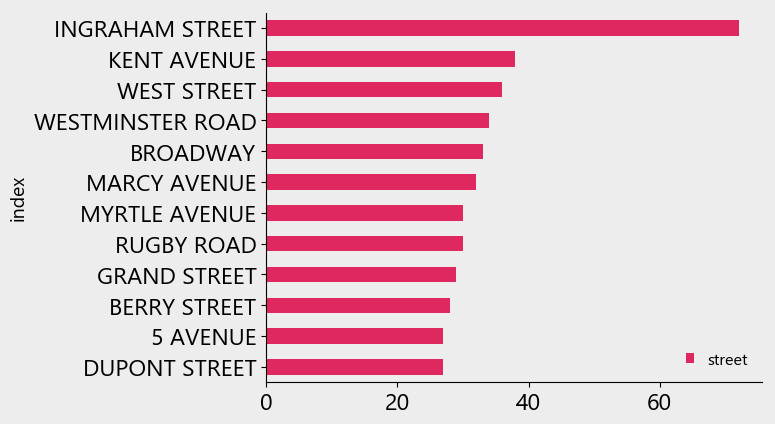

In [95]:
Brooklyn_films.street.value_counts().reset_index().sort_values(by='street',ascending=True).tail(12).plot(kind='barh',x='index')

In [96]:
Queens_films = films[films.Borough.str.contains("Queens",case=False,na=False)]
Queens_films.head(3)

,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,ZipCode(s),year,month,street
17,300423,Shooting Permit,07/18/2016 07:00...,07/18/2016 09:00...,07/14/2016 10:58...,Mayor's Office o...,34 AVENUE betwee...,Queens,1,114,Film,Feature,United States of...,11106,2016,07,34 AVENUE
54,300715,Shooting Permit,07/19/2016 07:00...,07/19/2016 09:00...,07/15/2016 12:17...,Mayor's Office o...,VERNON BOULEVARD...,Queens,1,114,Film,Feature,United States of...,11101,2016,07,VERNON BOULEVARD
97,301237,Shooting Permit,07/21/2016 08:00...,07/21/2016 09:00...,07/19/2016 09:06...,Mayor's Office o...,VERNON BOULEVARD...,Queens,1,114,Film,Feature,United States of...,11101,2016,07,VERNON BOULEVARD


In [201]:
que = Queens_films.street.value_counts().reset_index().sort_values(by='street',ascending=True).tail(5)
que

,index,street
4,VERNON BOULEVARD,16
3,JAMAICA AVENUE,18
2,36 STREET,27
1,LAUREL HILL BOUL...,58
0,35 STREET,61


In [202]:
que1 = que.sort_values(by='street',ascending=False)
que1

,index,street
0,35 STREET,61
1,LAUREL HILL BOUL...,58
2,36 STREET,27
3,JAMAICA AVENUE,18
4,VERNON BOULEVARD,16


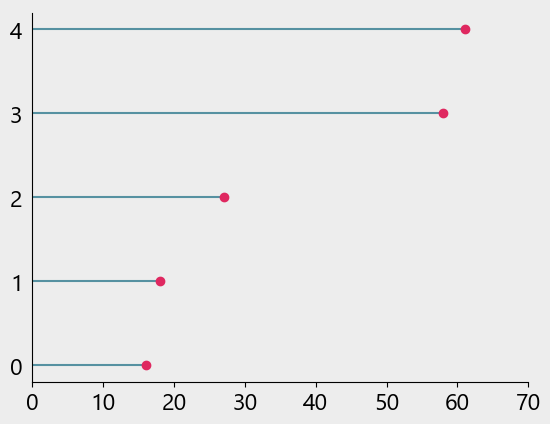

In [207]:
fig, ax = plt.subplots()

ax.hlines(que1.index.sort_values(ascending=False), xmin=0, xmax=que1.street,color='#5691A1')
ax.plot(que1.street.sort_values(ascending=True), que1.index, "o", color='#DF2860')
ax.set_xlim(0, 70)

ax.tick_params(left=False)

plt.savefig('queens.pdf')
plt.show()

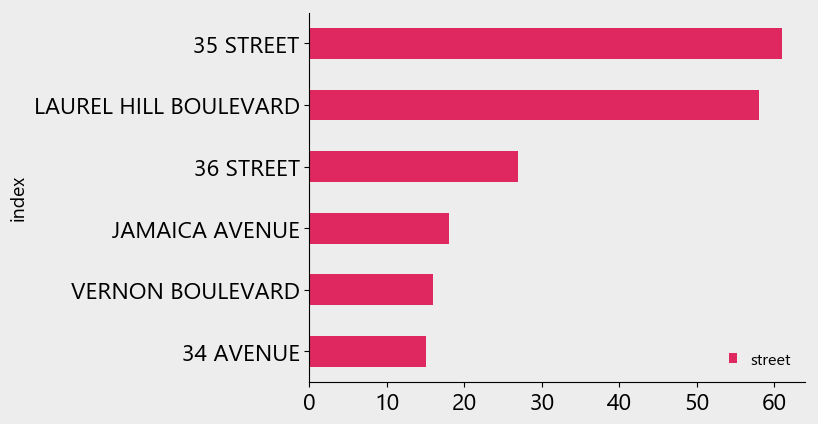

In [100]:
Queens_films.street.value_counts().reset_index().sort_values(by='street',ascending=True).tail(6).plot(kind='barh',x='index')

In [101]:
news = tv[tv.SubCategoryName.str.contains("News",case=False,na=False)]
news.head(3)

,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,ZipCode(s),year,month
175,302031,Shooting Permit,07/23/2016 04:00...,07/23/2016 11:00...,07/22/2016 11:51...,Mayor's Office o...,WEST 48 STREET...,Manhattan,5,18,Television,News,United States of...,10036,2016,07
335,298540,Shooting Permit,07/29/2016 09:00...,07/29/2016 07:00...,07/05/2016 11:03...,Mayor's Office o...,WEST 48 STREET...,Manhattan,5,18,Television,News,United States of...,10036,2016,07
347,303350,Shooting Permit,07/30/2016 04:00...,07/30/2016 11:00...,07/29/2016 02:55...,Mayor's Office o...,WEST 48 STREET...,Manhattan,5,18,Television,News,United States of...,10036,2016,07


In [102]:
news['street'] = news['ParkingHeld'].str.extract(r"^(.*?) between")
news.head()

C:\Users\kellykiki\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,ZipCode(s),year,month,street
175,302031,Shooting Permit,07/23/2016 04:00...,07/23/2016 11:00...,07/22/2016 11:51...,Mayor's Office o...,WEST 48 STREET...,Manhattan,5,18,Television,News,United States of...,10036,2016,07,WEST 48 STREET
335,298540,Shooting Permit,07/29/2016 09:00...,07/29/2016 07:00...,07/05/2016 11:03...,Mayor's Office o...,WEST 48 STREET...,Manhattan,5,18,Television,News,United States of...,10036,2016,07,WEST 48 STREET
347,303350,Shooting Permit,07/30/2016 04:00...,07/30/2016 11:00...,07/29/2016 02:55...,Mayor's Office o...,WEST 48 STREET...,Manhattan,5,18,Television,News,United States of...,10036,2016,07,WEST 48 STREET
365,303289,Shooting Permit,07/31/2016 03:00...,07/31/2016 11:00...,07/29/2016 12:09...,Mayor's Office o...,WEST 48 STREET...,Manhattan,5,18,Television,News,United States of...,10036,2016,07,WEST 48 STREET
415,303578,Shooting Permit,08/02/2016 05:00...,08/02/2016 10:00...,08/01/2016 12:46...,Mayor's Office o...,WEST 48 STREET...,Manhattan,5,18,Television,News,United States of...,10036,2016,08,WEST 48 STREET


In [105]:
in_the_news2 = news.groupby('year').street.value_counts().unstack().reset_index().fillna(0)
in_the_news2.head()

street,year,1271 Avenue of the Americas,37 STREET,44 DRIVE,47 ROAD,48 STREET,5 AVENUE,6 AVENUE,7 AVE,7 AVENUE,...,WEST 58 STREET,WEST 59 STREET,WEST 65 STREET,WEST 66 STREET,WEST 67 STREET,WEST 126 STREET,WEST 126 STREET,WEST 17TH ST,WEST END AVENUE,WILLIAM STREET
0,2012,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2013,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,...,0.0,1.0,0.0,0.0,1.0,2.0,2.0,1.0,0.0,0.0
2,2014,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,...,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2016,0.0,0.0,1.0,0.0,3.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [107]:
in_the_news2['total'] = in_the_news2.sum(axis=1)
#in_the_news.sort_values(by='total',ascending=True)
in_the_news2.head()

street,year,1271 Avenue of the Americas,37 STREET,44 DRIVE,47 ROAD,48 STREET,5 AVENUE,6 AVENUE,7 AVE,7 AVENUE,...,WEST 59 STREET,WEST 65 STREET,WEST 66 STREET,WEST 67 STREET,WEST 126 STREET,WEST 126 STREET,WEST 17TH ST,WEST END AVENUE,WILLIAM STREET,total
0,2012,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,86.0
1,2013,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,...,1.0,0.0,0.0,1.0,2.0,2.0,1.0,0.0,0.0,362.0
2,2014,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,366.0
3,2015,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,398.0
4,2016,0.0,0.0,1.0,0.0,3.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,514.0


In [108]:
in_the_news2.sort_values(by='total',inplace=True)
in_the_news2.tail()

street,year,1271 Avenue of the Americas,37 STREET,44 DRIVE,47 ROAD,48 STREET,5 AVENUE,6 AVENUE,7 AVE,7 AVENUE,...,WEST 59 STREET,WEST 65 STREET,WEST 66 STREET,WEST 67 STREET,WEST 126 STREET,WEST 126 STREET,WEST 17TH ST,WEST END AVENUE,WILLIAM STREET,total
1,2013,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,...,1.0,0.0,0.0,1.0,2.0,2.0,1.0,0.0,0.0,362.0
2,2014,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,366.0
3,2015,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,398.0
5,2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,432.0
4,2016,0.0,0.0,1.0,0.0,3.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,514.0


In [109]:
in_the_news2.drop(columns='total',inplace=True)
in_the_news2.tail()

street,year,1271 Avenue of the Americas,37 STREET,44 DRIVE,47 ROAD,48 STREET,5 AVENUE,6 AVENUE,7 AVE,7 AVENUE,...,WEST 58 STREET,WEST 59 STREET,WEST 65 STREET,WEST 66 STREET,WEST 67 STREET,WEST 126 STREET,WEST 126 STREET,WEST 17TH ST,WEST END AVENUE,WILLIAM STREET
1,2013,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,...,0.0,1.0,0.0,0.0,1.0,2.0,2.0,1.0,0.0,0.0
2,2014,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,...,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2016,0.0,0.0,1.0,0.0,3.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [110]:
in_the_news2.dtypes

street
year                            object
1271 Avenue of the Americas    float64
37 STREET                      float64
44 DRIVE                       float64
47 ROAD                        float64
48 STREET                      float64
5 AVENUE                       float64
6 AVENUE                       float64
7 AVE                          float64
7 AVENUE                       float64
78 CRESCENT                    float64
8 AVENUE                       float64
9 AVENUE                       float64
ALLEN STREET                   float64
ARTHUR AVENUE                  float64
ASHLAND PLACE                  float64
AVENUE OF THE AMERICAS         float64
BEDFORD AVENUE                 float64
BOERUM PLACE                   float64
BROADWAY                       float64
CENTRAL PARK WEST              float64
COLUMBUS AVENUE                float64
COLUMBUS CIRCLE                float64
COOPER SQUARE                  float64
CROSBY STREET                  float64
EAST   17 STREET  

In [111]:
in_the_news2.tail().plot(kind='line',x='year',figsize=(150,150))

ax.set_xticks([2012,2013,2014,2015,2016,2017])
ax.set_xticklabels(['2012','2013','2014','2015','2016','2017'],color='black')
ax.set_yticks([0,100,200])
ax.set_yticklabels(['0','100','200'])

[Text(0,-2,'0'), Text(0,0,'100'), Text(0,2,'200')]

In [112]:
west44str = news.loc[(news['year'] == '2013')]
west44str

,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,ZipCode(s),year,month,street
11471,131992,Shooting Permit,11/28/2013 01:00...,11/28/2013 06:00...,11/26/2013 12:09...,Mayor's Office o...,WEST 48 STREET...,Manhattan,5,18,Television,News,United States of...,10036,2013,11,WEST 48 STREET
11484,118052,Shooting Permit,08/17/2013 03:00...,08/17/2013 01:00...,08/15/2013 03:51...,Mayor's Office o...,WEST 48 STREET...,Manhattan,5,18,Television,News,United States of...,10036,2013,08,WEST 48 STREET
11504,133916,Shooting Permit,12/12/2013 01:00...,12/12/2013 06:00...,12/10/2013 11:32...,Mayor's Office o...,WEST 48 STREET...,Manhattan,5,18,Television,News,United States of...,10036,2013,12,WEST 48 STREET
11877,93676,Shooting Permit,04/10/2013 04:00...,04/10/2013 08:00...,04/04/2013 02:30...,Mayor's Office o...,WEST 53 STREET...,Manhattan,5,18,Television,News,United States of...,10019,2013,04,WEST 53 STREET
11960,111861,Shooting Permit,07/09/2013 06:00...,07/09/2013 10:00...,07/08/2013 01:05...,Mayor's Office o...,WEST 44 STREET...,Manhattan,5,14,Television,News,United States of...,10036,2013,07,WEST 44 STREET
13218,126025,Shooting Permit,10/17/2013 02:00...,10/17/2013 10:00...,10/16/2013 02:10...,Mayor's Office o...,WEST 48 STREET...,Manhattan,5,18,Television,News,United States of...,10036,2013,10,WEST 48 STREET
13500,133101,Shooting Permit,12/05/2013 01:00...,12/05/2013 01:00...,12/04/2013 12:17...,Mayor's Office o...,WEST 47 STREET...,Manhattan,5,18,Television,News,United States of...,10036,2013,12,WEST 47 STREET
13794,118611,Shooting Permit,08/24/2013 03:00...,08/24/2013 12:00...,08/20/2013 01:56...,Mayor's Office o...,WEST 48 STREET...,Manhattan,5,18,Television,News,United States of...,10036,2013,08,WEST 48 STREET
15705,134207,Shooting Permit,12/16/2013 04:00...,12/16/2013 01:00...,12/12/2013 08:24...,Mayor's Office o...,WEST 48 STREET...,Manhattan,5,18,Television,News,United States of...,10036,2013,12,WEST 48 STREET
16350,111527,Shooting Permit,07/12/2013 12:00...,07/12/2013 09:00...,07/04/2013 06:22...,Mayor's Office o...,WEST 44 STREET...,Manhattan,5,14,Television,News,United States of...,10036,2013,07,WEST 44 STREET


In [113]:
#west44str.loc[(west44str['street'].str.contains('.*WEST 44 STREET.*'))]

In [188]:
test = in_the_news2[['year','WEST   44 STREET', 'WEST   48 STREET','WEST   47 STREET']].copy()
                     #,'BROADWAY','WEST   35 STREET','8 AVENUE']].copy()
test

street,year,WEST 44 STREET,WEST 48 STREET,WEST 47 STREET
0,2012,1.0,1.0,0.0
1,2013,66.0,77.0,4.0
2,2014,0.0,159.0,4.0
3,2015,0.0,175.0,2.0
5,2017,0.0,194.0,3.0
4,2016,0.0,221.0,5.0


In [189]:
news.street.value_counts()

WEST   48 STREET               827
WEST   44 STREET                67
WEST   47 STREET                18
BROADWAY                         9
WEST   35 STREET                 8
8 AVENUE                         5
WEST   41 STREET                 4
PARK AVENUE                      4
7 AVENUE                         4
WEST   45 STREET                 4
WEST   10 STREET                 4
EAST   51 STREET                 4
WEST   58 STREET                 4
ST NICHOLAS AVENUE               3
5 AVENUE                         3
6 AVENUE                         3
WEST   53 STREET                 3
48 STREET                        3
EAST   68 STREET                 3
MALCOLM X BOULEVARD              3
MADISON AVENUE                   3
WEST   43 STREET                 3
WEST   46 STREET                 3
EAST   61 STREET                 3
FIFTH AVENUE                     2
WEST   17 STREET                 2
WEST   56 STREET                 2
EAST   50 STREET                 2
WEST   40 STREET    

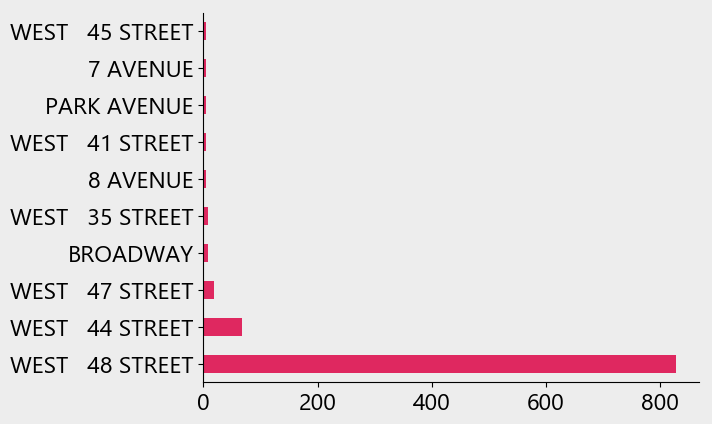

In [190]:
news.street.value_counts().head(10).plot(kind='barh')

In [191]:
bar_colors = ['#DF2860','#5691A1','#9C6C7A','#FFEDAF','#4D184C','#F9E3CB','#64D9E2','#5691A1','#182A42','#4B1026','#056561','#4C4C4C']

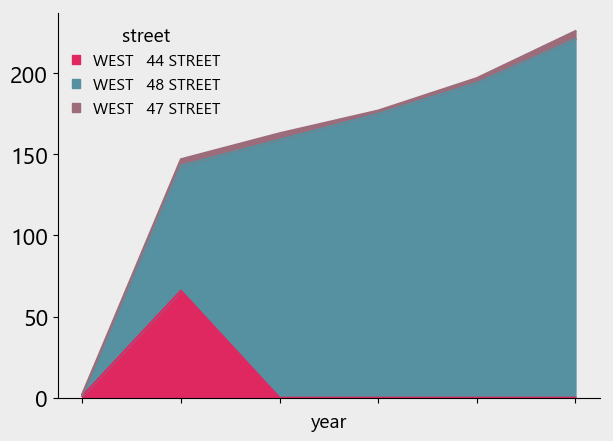

In [194]:
test.plot(kind='area',x='year',figsize=(7,5),color=bar_colors)

ax.set_yticks([0,50,100,150,200,250])
ax.set_yticklabels(['0','50','100','150','200','250'])

ax.set_xticks([2012,2013,2014,2015,2016,2017])
ax.set_xticklabels(['2012','2013','2014','2015','2016','2017'])

plt.savefig('news-by-year.pdf')
plt.show()

In [119]:
df_filtered = pd.read_csv('Film_Permits_filtered.csv')

In [120]:
df_filtered.head()

,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,ZipCode(s),year,month,start_time,end_time,street
0,300134,Shooting Permit,07/18/2016 06:00...,07/18/2016 12:00...,07/13/2016 10:28...,Mayor's Office o...,COLUMBUS AVENUE ...,Manhattan,7,20,Television,Morning Show,United States of...,10023,2016,7,2016-07-18 06:00:00,2016-07-18 12:00:00,COLUMBUS AVENUE
1,299797,Shooting Permit,07/18/2016 07:00...,07/18/2016 07:00...,07/11/2016 06:49...,Mayor's Office o...,22 STREET betwee...,Queens,2,108,Television,Cable-episodic,United States of...,11101,2016,7,2016-07-18 07:00:00,2016-07-18 19:00:00,22 STREET betwee...
2,300179,Shooting Permit,07/18/2016 07:00...,07/18/2016 10:00...,07/13/2016 12:11...,Mayor's Office o...,MONITOR STREET b...,Queens,"1, 2","108, 94",Television,Episodic series,United States of...,"11101, 11222, 11378",2016,7,2016-07-18 07:00:00,2016-07-18 22:00:00,MONITOR STREET b...
3,300630,Shooting Permit,07/18/2016 12:00...,07/18/2016 09:00...,07/14/2016 10:13...,Mayor's Office o...,ROCKAWAY BEACH B...,Queens,14,100,Commercial,Commercial,United States of...,11692,2016,7,2016-07-18 12:00:00,2016-07-18 21:00:00,ROCKAWAY BEACH B...
4,300127,Shooting Permit,07/18/2016 06:00...,07/18/2016 11:59...,07/13/2016 10:04...,Mayor's Office o...,10 AVENUE betwee...,Manhattan,4,10,Television,Reality,United States of...,10001,2016,7,2016-07-18 06:00:00,2016-07-18 23:59:00,10 AVENUE betwee...


In [121]:
df_filtered.year.value_counts()

2015    8898
2017    8172
2013    8034
2016    8029
2014    7919
2012    6867
Name: year, dtype: int64

In [122]:
df_filtered['street'] = df_filtered['ParkingHeld'].str.extract(r"^(.*?) between")
df_filtered.head(50)

,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,ZipCode(s),year,month,start_time,end_time,street
0,300134,Shooting Permit,07/18/2016 06:00...,07/18/2016 12:00...,07/13/2016 10:28...,Mayor's Office o...,COLUMBUS AVENUE ...,Manhattan,7,20,Television,Morning Show,United States of...,10023,2016,7,2016-07-18 06:00:00,2016-07-18 12:00:00,COLUMBUS AVENUE
1,299797,Shooting Permit,07/18/2016 07:00...,07/18/2016 07:00...,07/11/2016 06:49...,Mayor's Office o...,22 STREET betwee...,Queens,2,108,Television,Cable-episodic,United States of...,11101,2016,7,2016-07-18 07:00:00,2016-07-18 19:00:00,22 STREET
2,300179,Shooting Permit,07/18/2016 07:00...,07/18/2016 10:00...,07/13/2016 12:11...,Mayor's Office o...,MONITOR STREET b...,Queens,"1, 2","108, 94",Television,Episodic series,United States of...,"11101, 11222, 11378",2016,7,2016-07-18 07:00:00,2016-07-18 22:00:00,MONITOR STREET
3,300630,Shooting Permit,07/18/2016 12:00...,07/18/2016 09:00...,07/14/2016 10:13...,Mayor's Office o...,ROCKAWAY BEACH B...,Queens,14,100,Commercial,Commercial,United States of...,11692,2016,7,2016-07-18 12:00:00,2016-07-18 21:00:00,ROCKAWAY BEACH B...
4,300127,Shooting Permit,07/18/2016 06:00...,07/18/2016 11:59...,07/13/2016 10:04...,Mayor's Office o...,10 AVENUE betwee...,Manhattan,4,10,Television,Reality,United States of...,10001,2016,7,2016-07-18 06:00:00,2016-07-18 23:59:00,10 AVENUE
5,43547,Shooting Permit,01/10/2012 07:00...,01/10/2012 07:00...,01/04/2012 12:25...,Mayor's Office o...,EAGLE STREET bet...,Brooklyn,"1, 2","108, 94",Television,Episodic series,United States of...,"11101, 11222",2012,1,2012-01-10 07:00:00,2012-01-10 19:00:00,EAGLE STREET
6,300435,Shooting Permit,07/18/2016 07:00...,07/18/2016 09:00...,07/14/2016 11:24...,Mayor's Office o...,KINGSLAND AVENUE...,Brooklyn,1,94,Television,Episodic series,United States of...,11222,2016,7,2016-07-18 07:00:00,2016-07-18 21:00:00,KINGSLAND AVENUE
7,300417,Shooting Permit,07/18/2016 06:00...,07/18/2016 10:00...,07/14/2016 10:35...,Mayor's Office o...,STARR AVENUE bet...,Queens,2,108,Television,Episodic series,United States of...,11101,2016,7,2016-07-18 06:00:00,2016-07-18 22:00:00,STARR AVENUE
8,300441,Shooting Permit,07/18/2016 09:30...,07/18/2016 11:00...,07/14/2016 11:45...,Mayor's Office o...,WESTMINSTER ROAD...,Brooklyn,14,70,WEB,Not Applicable,United States of...,11218,2016,7,2016-07-18 09:30:00,2016-07-18 23:00:00,WESTMINSTER ROAD
9,300122,Theater Load in ...,07/18/2016 12:01...,07/20/2016 06:00...,07/13/2016 09:20...,Mayor's Office o...,WEST 126 STREET...,Manhattan,10,28,Theater,Theater,United States of...,10027,2016,7,2016-07-18 12:01:00,2016-07-20 06:00:00,WEST 126 STREET


In [123]:
df_filtered.street.value_counts()

WEST   48 STREET                     1153
STARR AVENUE                          947
AMSTERDAM AVENUE                      770
NORTH HENRY STREET                    767
WEST   55 STREET                      748
BROADWAY                              718
KINGSLAND AVENUE                      684
35 STREET                             529
ASHLAND PLACE                         512
WEST   33 STREET                      498
5 AVENUE                              472
7 AVENUE                              420
MONITOR STREET                        402
MESEROLE AVENUE                       383
6 AVENUE                              361
WEST   35 STREET                      350
22 STREET                             346
WEST   44 STREET                      323
WEST STREET                           275
MADISON AVENUE                        254
37 STREET                             247
LAFAYETTE STREET                      244
WEST   43 STREET                      242
PARK AVENUE                       

In [124]:
df_filtered['start_time'] = pd.to_datetime(df_filtered['StartDateTime'], format='%m/%d/%Y %H:%M:%S %p')
df_filtered.head(1)

,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,ZipCode(s),year,month,start_time,end_time,street
0,300134,Shooting Permit,07/18/2016 06:00...,07/18/2016 12:00...,07/13/2016 10:28...,Mayor's Office o...,COLUMBUS AVENUE ...,Manhattan,7,20,Television,Morning Show,United States of...,10023,2016,7,2016-07-18 06:00:00,2016-07-18 12:00:00,COLUMBUS AVENUE


In [125]:
df_filtered['end_time'] = pd.to_datetime(df_filtered['EndDateTime'])
df_filtered.head(1)

,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,ZipCode(s),year,month,start_time,end_time,street
0,300134,Shooting Permit,07/18/2016 06:00...,07/18/2016 12:00...,07/13/2016 10:28...,Mayor's Office o...,COLUMBUS AVENUE ...,Manhattan,7,20,Television,Morning Show,United States of...,10023,2016,7,2016-07-18 06:00:00,2016-07-18 12:00:00,COLUMBUS AVENUE


In [173]:
df_filtered['duration'] = (df_filtered.end_time - df_filtered.start_time).astype('timedelta64[h]')
df_filtered.tail(5)

,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,ZipCode(s),year,month,start_time,end_time,street,duration
47914,97992,Shooting Permit,05/01/2013 02:00...,05/02/2013 05:00...,04/26/2013 02:02...,Mayor's Office o...,HAMILTON PLACE b...,Manhattan,9,"26, 30",Television,Cable-episodic,United States of...,10031,2013,5,2013-05-01 02:00:00,2013-05-02 05:00:00,HAMILTON PLACE,27.0
47915,233405,Rigging Permit,07/07/2015 07:00...,07/10/2015 09:00...,07/06/2015 11:21...,Mayor's Office o...,22 ST between QU...,Queens,2,108,Television,Cable-episodic,United States of...,11101,2015,7,2015-07-07 07:00:00,2015-07-10 21:00:00,22 ST,86.0
47916,186963,Shooting Permit,10/31/2014 07:00...,10/31/2014 10:00...,10/30/2014 03:43...,Mayor's Office o...,STARR AVENUE bet...,Queens,2,108,Television,Episodic series,United States of...,11101,2014,10,2014-10-31 07:00:00,2014-10-31 22:00:00,STARR AVENUE,15.0
47917,127839,Shooting Permit,11/06/2013 07:00...,11/06/2013 11:00...,11/01/2013 10:59...,Mayor's Office o...,JEWEL STREET bet...,Brooklyn,1,94,Television,Episodic series,United States of...,11222,2013,11,2013-11-06 07:00:00,2013-11-06 23:00:00,JEWEL STREET,16.0
47918,248226,Shooting Permit,10/12/2015 08:00...,10/12/2015 07:00...,10/06/2015 07:22...,Mayor's Office o...,MERCER STREET be...,Manhattan,2,"1, 5",Still Photography,Not Applicable,United States of...,10012,2015,10,2015-10-12 08:00:00,2015-10-12 19:00:00,MERCER STREET,11.0


In [178]:
(df_filtered.duration.sum()/2555)/7

53.66385239027118

In [139]:
df_filtered['duration'] = df_filtered['duration']/24
df_filtered.tail(5)

,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,ZipCode(s),year,month,start_time,end_time,street,duration
47914,97992,Shooting Permit,05/01/2013 02:00...,05/02/2013 05:00...,04/26/2013 02:02...,Mayor's Office o...,HAMILTON PLACE b...,Manhattan,9,"26, 30",Television,Cable-episodic,United States of...,10031,2013,5,2013-05-01 02:00:00,2013-05-02 05:00:00,HAMILTON PLACE,0.046875
47915,233405,Rigging Permit,07/07/2015 07:00...,07/10/2015 09:00...,07/06/2015 11:21...,Mayor's Office o...,22 ST between QU...,Queens,2,108,Television,Cable-episodic,United States of...,11101,2015,7,2015-07-07 07:00:00,2015-07-10 21:00:00,22 ST,0.149306
47916,186963,Shooting Permit,10/31/2014 07:00...,10/31/2014 10:00...,10/30/2014 03:43...,Mayor's Office o...,STARR AVENUE bet...,Queens,2,108,Television,Episodic series,United States of...,11101,2014,10,2014-10-31 07:00:00,2014-10-31 22:00:00,STARR AVENUE,0.026042
47917,127839,Shooting Permit,11/06/2013 07:00...,11/06/2013 11:00...,11/01/2013 10:59...,Mayor's Office o...,JEWEL STREET bet...,Brooklyn,1,94,Television,Episodic series,United States of...,11222,2013,11,2013-11-06 07:00:00,2013-11-06 23:00:00,JEWEL STREET,0.027778
47918,248226,Shooting Permit,10/12/2015 08:00...,10/12/2015 07:00...,10/06/2015 07:22...,Mayor's Office o...,MERCER STREET be...,Manhattan,2,"1, 5",Still Photography,Not Applicable,United States of...,10012,2015,10,2015-10-12 08:00:00,2015-10-12 19:00:00,MERCER STREET,0.019097


In [149]:
test2 = df_filtered.sort_values(by='duration',ascending=True)
test2.tail(10)

#.plot(kind='barh',x='street',y='duration',figsize=(8,5),width=0.3)

,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,ZipCode(s),year,month,start_time,end_time,street,duration
41035,48957,Theater Load in ...,03/11/2012 06:00...,04/23/2012 10:00...,03/08/2012 02:09...,Mayor's Office o...,WEST 46 STREET...,Manhattan,5,18,Theater,Theater,United States of...,10036,2012,3,2012-03-11 06:00:00,2012-04-23 22:00:00,WEST 46 STREET,1.819444
20337,45394,Theater Load in ...,02/08/2012 06:00...,03/24/2012 11:59...,01/30/2012 02:07...,Mayor's Office o...,WEST 45 STREET...,Manhattan,5,"14, 18",Theater,Theater,United States of...,10036,2012,2,2012-02-08 06:00:00,2012-03-24 23:59:00,WEST 45 STREET,1.904514
37796,60103,Theater Load in ...,06/02/2012 12:01...,07/31/2012 01:00...,05/30/2012 11:03...,Mayor's Office o...,WEST 51 STREET...,Manhattan,5,18,Theater,Theater,United States of...,"10019, 10020",2012,6,2012-06-02 12:01:00,2012-07-31 13:00:00,WEST 51 STREET,2.458333
13008,44604,Theater Load in ...,01/27/2012 05:00...,03/27/2012 10:00...,01/19/2012 11:00...,Mayor's Office o...,WEST 55 STREET...,Manhattan,5,18,Theater,Theater,United States of...,10019,2012,1,2012-01-27 05:00:00,2012-03-27 22:00:00,WEST 55 STREET,2.529514
39619,64937,Theater Load in ...,07/09/2012 06:00...,09/09/2012 10:00...,07/06/2012 01:52...,Mayor's Office o...,WEST 47 STREET...,Manhattan,5,18,Theater,Theater,United States of...,10036,2012,7,2012-07-09 06:00:00,2012-09-09 22:00:00,WEST 47 STREET,2.611111
35600,44756,Theater Load in ...,01/23/2012 07:00...,03/30/2012 08:00...,01/20/2012 01:56...,Mayor's Office o...,WEST 44 STREET...,Manhattan,5,14,Theater,Theater,United States of...,10036,2012,1,2012-01-23 07:00:00,2012-03-30 20:00:00,WEST 44 STREET,2.814236
6985,351665,Theater Load in ...,06/01/2017 12:01...,08/08/2017 11:59...,05/15/2017 01:19...,Mayor's Office o...,WEST 62 STREET...,Manhattan,7,20,Theater,Theater,United States of...,10023,2017,6,2017-06-01 12:01:00,2017-08-08 23:59:00,WEST 62 STREET,2.852431
23457,58198,Theater Load in ...,05/21/2012 07:00...,07/31/2012 11:59...,05/15/2012 05:38...,Mayor's Office o...,WEST 51 STREET...,Manhattan,5,18,Theater,Theater,United States of...,"10019, 10020",2012,5,2012-05-21 07:00:00,2012-07-31 23:59:00,WEST 51 STREET,2.986111
33522,72410,Shooting Permit,09/18/2012 09:00...,12/31/2012 01:00...,09/14/2012 06:50...,Mayor's Office o...,WEST 33 STREET...,Manhattan,4,10,Television,Talk Show,United States of...,10001,2012,9,2012-09-18 09:00:00,2012-12-31 01:00:00,WEST 33 STREET,4.319444
35327,74427,Theater Load in ...,10/28/2012 06:00...,03/24/2013 06:00...,10/09/2012 12:44...,Mayor's Office o...,AMSTERDAM AVENUE...,Manhattan,7,20,Theater,Theater,United States of...,10023,2012,10,2012-10-28 06:00:00,2013-03-24 06:00:00,AMSTERDAM AVENUE,6.125000


In [150]:
#test.tail(15).plot(kind='barh',x='street',y='duration',figsize=(8,5),width=0.3)

In [163]:
# fig, ax = plt.subplots()

# ax.hlines(test2.street, xmin=0, xmax=test2.duration,color='grey')
# ax.plot(test2.duration, test2.street, "o", color='orange')
# ax.set_xlim(0, 200)

(0, 5)

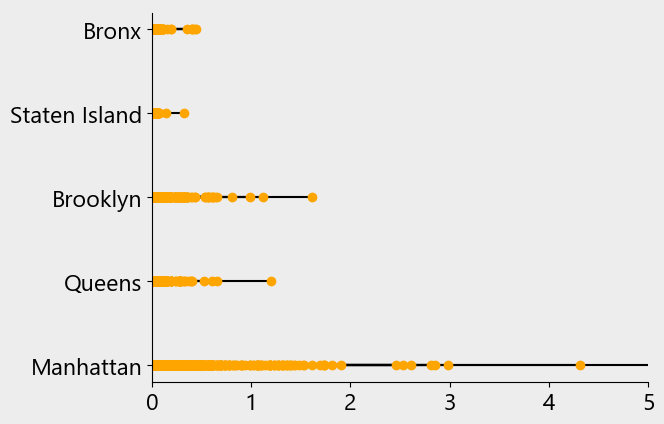

In [153]:
fig, ax = plt.subplots()

ax.hlines(df_filtered.Borough, xmin=0, xmax=df_filtered.duration,color='black')
ax.plot(df_filtered.duration, df_filtered.Borough, "o", color='orange')
ax.set_xlim(0, 5)

In [154]:
test3 = df_filtered.Borough.value_counts().sort_values(ascending=True)
test3 = pd.DataFrame(test3)
test3

,Borough
Staten Island,599
Bronx,1290
Queens,7507
Brooklyn,14592
Manhattan,23931


(0, 25000)

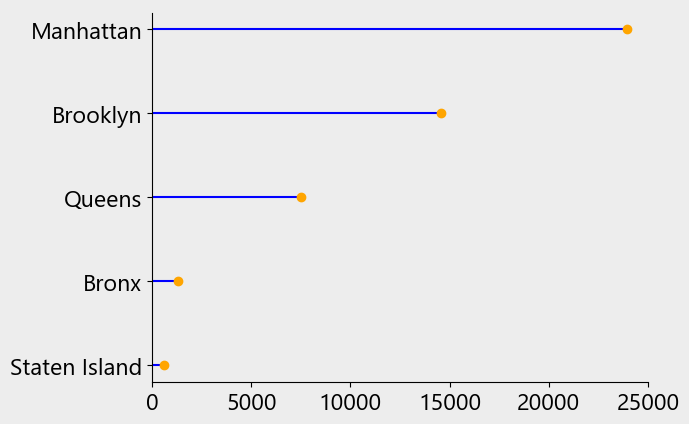

In [155]:
fig, ax = plt.subplots()

ax.hlines(test3.index, xmin=0, xmax=test3.Borough,color='blue')
ax.plot(test3.Borough, test3.index, "o", color='orange')
ax.set_xlim(0, 25000)

In [156]:
df_filtered.groupby('year').Borough.value_counts()

year  Borough      
2012  Manhattan        3750
      Brooklyn         1984
      Queens            927
      Bronx             112
      Staten Island      94
2013  Manhattan        4252
      Brooklyn         2318
      Queens           1218
      Bronx             138
      Staten Island     108
2014  Manhattan        4018
      Brooklyn         2415
      Queens           1211
      Bronx             185
      Staten Island      90
2015  Manhattan        4324
      Brooklyn         2676
      Queens           1534
      Bronx             275
      Staten Island      89
2016  Manhattan        3830
      Brooklyn         2536
      Queens           1313
      Bronx             251
      Staten Island      99
2017  Manhattan        3757
      Brooklyn         2663
      Queens           1304
      Bronx             329
      Staten Island     119
Name: Borough, dtype: int64

In [167]:
test4 = test2.groupby('street').duration.sum().sort_values(ascending=True).tail(10)
test4 = pd.DataFrame(test4)
test4

,duration
street,
KINGSLAND AVENUE,19.482639
BROADWAY,21.869792
WEST 48 STREET,24.486111
STARR AVENUE,26.039931
WEST 55 STREET,29.635417
ASHLAND PLACE,29.663194
WEST 33 STREET,31.704861
WEST 51 STREET,33.267361
WEST 35 STREET,38.076389


In [172]:
test2.duration.sum()/7

238.04017857142858

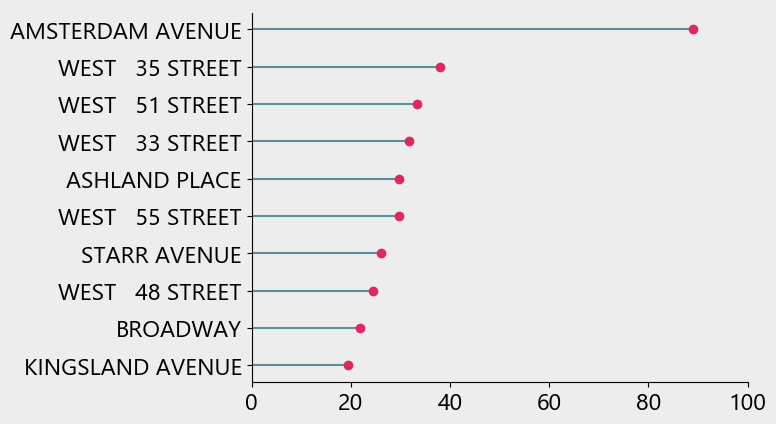

In [168]:
fig, ax = plt.subplots()

ax.hlines(df_filtered.index, xmin=0, xmax=test4.duration, color='#5691A1')
ax.plot(test4.duration, test4.index, "o", color='#DF2860')
ax.set_xlim(0, 100)

plt.savefig('top-streets-duration.pdf')
plt.show()